# MNIST by Ofitserov Vladislav
* Data reading
* Some models training
* Stacking


### Использование ML подходов вызвано требованиями задания

### Libraries import

In [230]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import tensorflow as tf
from sklearn.model_selection import train_test_split
# import keras
# from keras.layers import Conv2D, MaxPooling2D
# # from keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization
# from keras.models import Sequential
# from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
# from keras.optimizers import Adam, RMSprop
# from keras.preprocessing.image import ImageDataGenerator
import librosa
import librosa.display
from sklearn.ensemble import RandomForestClassifier
# tf.random.set_seed(42)
from sklearn.preprocessing import StandardScaler
from mlxtend.classifier import StackingCVClassifier

### Data reading

In [ ]:
!unzip ./data/test.zip -d ./data/test

In [ ]:
!unzip ./data/train.zip -d ./data/train

In [93]:
import PIL

IMAGE_TRAIN_PATH = "./data/train/image"
VOICE_TRAIN_PATH = "./data/train/voice"
IMAGE_TEST_PATH = "./data/test/image/"
VOICE_TEST_PATH = "./data/test/voice/"

def read_image(path):
    return PIL.Image.open(path).convert('L')

In [94]:
def extract_image_features(image_folder):
    image_vectors = []
    indices = []
    for image_name in os.listdir(image_folder):
        index = os.path.splitext(image_name)[0]
        indices.append(index)
        image = read_image(os.path.join(image_folder, image_name))
        image_vector = np.array(image).reshape(-1)
        image_vectors.append(image_vector)
    return pd.DataFrame({
        'index': indices,
        'image_vector': image_vectors,
    })

In [290]:
image_features = extract_image_features(IMAGE_TRAIN_PATH)
image_features.head()

,index,image_vector
0,8_83,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,8_97,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,0_9,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,6_123,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,6_92,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [156]:
image_features['image_vector'][0].shape

(784,)

In [149]:
image_features['image_vector'][1][0]

0

In [96]:
def load_wav(path):
    return librosa.load(path, sr=8000)

In [98]:
def extract_voice_features(voice_folder, numcep=13, hop_length=256):
    voice_vectors = []
    indices = []
    for record_name in os.listdir(voice_folder):
        index = os.path.splitext(record_name)[0]
        indices.append(index)
        signal, sr = load_wav(
            os.path.join(voice_folder, record_name)
        )
        mfcc_features = librosa.feature.mfcc(
            signal, sr=sr, n_mfcc=numcep, hop_length=hop_length
        )
        voice_vector = mfcc_features.mean(axis=1)
        voice_vectors.append(voice_vector)
    return pd.DataFrame({
        'index': indices,
        'voice_vector': voice_vectors,
    })

In [289]:
voice_features = extract_voice_features(VOICE_TRAIN_PATH)
voice_features.head()

,index,voice_vector
0,3_14,"[-200.58705, 69.982635, 25.777464, 17.361498, ..."
1,8_129,"[-404.6011, 30.715576, 49.71539, -3.0432968, -..."
2,8_115,"[-229.66423, 62.60928, 43.071537, -3.3741913, ..."
3,3_28,"[-370.25107, 63.151653, 27.026638, 33.091003, ..."
4,4_21,"[-161.74364, 97.68022, 10.080739, -67.71256, -..."


In [292]:
train_data = image_features.merge(voice_features, on='index')
train_data

,index,image_vector,voice_vector
0,8_83,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-345.2558, 35.548164, 60.741657, -9.0887575, ..."
1,8_97,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-310.2153, 25.067036, 32.06105, 1.8527598, -5..."
2,0_9,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-204.57408, 60.8926, 38.705795, 0.86006045, -..."
3,6_123,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-420.96667, 51.802544, 56.201344, 17.237286, ..."
4,6_92,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-169.11893, 35.13347, 51.041916, 7.275878, -3..."
5,6_86,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-272.04968, 31.637547, 24.71309, 29.469238, -..."
6,6_137,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-198.59682, 57.77148, 54.31835, 0.27237153, -..."
7,1_64,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-406.80603, 88.93108, -2.925573, -11.360523, ..."
8,8_40,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-347.5673, 30.565828, 48.974537, 4.1990952, -..."
9,6_79,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-187.03117, 69.607216, 68.47904, 4.7152686, -..."


In [293]:
train_data["target"] = train_data["index"].apply(lambda x: int(x[0]))

In [294]:
train_data.head()

,index,image_vector,voice_vector,target
0,8_83,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-345.2558, 35.548164, 60.741657, -9.0887575, ...",8
1,8_97,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-310.2153, 25.067036, 32.06105, 1.8527598, -5...",8
2,0_9,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-204.57408, 60.8926, 38.705795, 0.86006045, -...",0
3,6_123,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-420.96667, 51.802544, 56.201344, 17.237286, ...",6
4,6_92,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-169.11893, 35.13347, 51.041916, 7.275878, -3...",6


In [112]:
# dataset[:,'voice_vector'].max

In [295]:
image_features_test = extract_image_features(IMAGE_TEST_PATH)
image_features_test.head()

,index,image_vector
0,348,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,412,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,374,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,360,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,406,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [296]:
voice_features_test = extract_voice_features(VOICE_TEST_PATH)
voice_features_test.head()

,index,voice_vector
0,249,"[-338.2546, 71.396866, -18.127146, 0.8928127, ..."
1,275,"[-215.90665, 49.47687, 47.599987, 12.017453, -..."
2,261,"[-193.52263, 101.17831, -7.8339224, -6.396782,..."
3,16,"[-138.30348, 66.29489, -4.0794687, 3.6745713, ..."
4,103,"[-431.91904, 28.006733, 44.961388, 13.179547, ..."


In [297]:
test_data = image_features_test.merge(voice_features_test, on='index')
test_data.shape

(500, 3)

In [298]:
test_data.head()


,index,image_vector,voice_vector
0,348,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-197.35329, 52.553474, 62.34636, -22.09729, -..."
1,412,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-305.40225, 61.219105, -23.535604, -16.444464..."
2,374,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-207.27509, 22.495293, 28.65708, 14.687491, -..."
3,360,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-397.51498, 128.96341, -5.3257675, -32.66901,..."
4,406,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-185.442, 37.630096, 45.17549, -1.119002, -77..."


In [114]:
train_data, test_data = train_test_split(
    train_data, test_size=0.2, random_state=42
)

In [299]:
train_data.shape

(1500, 4)

In [1]:
X_train = np.hstack((
    np.vstack(train_data["voice_vector"]),
    np.vstack(train_data["image_vector"])
))
y_train = train_data["target"]
X_test = np.hstack((
    np.vstack(test_data["voice_vector"]),
    np.vstack(test_data["image_vector"])
))
# y_test = test_data["target"]

NameError: name 'np' is not defined

In [303]:
X_train

array([[-345.2558  ,   35.548164,   60.741657, ...,    0.      ,
           0.      ,    0.      ],
       [-310.2153  ,   25.067036,   32.06105 , ...,    0.      ,
           0.      ,    0.      ],
       [-204.57408 ,   60.8926  ,   38.705795, ...,    0.      ,
           0.      ,    0.      ],
       ...,
       [-326.00116 ,   42.143692,   40.220104, ...,    0.      ,
           0.      ,    0.      ],
       [-196.26115 ,  118.43974 ,   -8.702779, ...,    0.      ,
           0.      ,    0.      ],
       [-162.3262  ,   62.400246,   59.710205, ...,    0.      ,
           0.      ,    0.      ]], dtype=float32)

### Some models training

In [305]:
clf1 = RandomForestClassifier(n_estimators=1000, n_jobs=-1)
clf1.fit(X_train, y_train)
# clf1.score(X_test, y_test)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [137]:
from sklearn.svm import LinearSVC

In [306]:
clf2 = LinearSVC( tol=1e-6)
clf2.fit(X_train, y_train)
# clf2.score(X_test, y_test)
clf2

/Users/ofirserovlad/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=1e-06,
          verbose=0)

In [157]:
from sklearn.neighbors import KNeighborsClassifier

In [307]:
clf3 = KNeighborsClassifier(n_neighbors=4 )
clf3.fit(X_train, y_train)
# clf3.score(X_test, y_test)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [180]:
from sklearn.ensemble import GradientBoostingClassifier

In [309]:
clf4 = GradientBoostingClassifier()
clf4.fit(X_train, y_train)
# clf4.score(X_test, y_test)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [183]:
from sklearn.ensemble import AdaBoostClassifier

In [310]:
clf5 = AdaBoostClassifier()
clf5.fit(X_train, y_train)
# clf5.score(X_test, y_test)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [194]:
from catboost import CatBoostClassifier

In [311]:
model = CatBoostClassifier(iterations=1000, 
                           devices='0:1',
                          ).fit(X_train, y_train)

0:	learn: 2.2478814	total: 309ms	remaining: 5m 8s
1:	learn: 2.1858030	total: 650ms	remaining: 5m 24s
2:	learn: 2.1307099	total: 1.16s	remaining: 6m 26s
3:	learn: 2.0757142	total: 1.57s	remaining: 6m 30s
4:	learn: 2.0329305	total: 1.89s	remaining: 6m 16s
5:	learn: 1.9832582	total: 2.17s	remaining: 5m 58s
6:	learn: 1.9445692	total: 2.43s	remaining: 5m 45s
7:	learn: 1.9081882	total: 2.72s	remaining: 5m 37s
8:	learn: 1.8718148	total: 2.99s	remaining: 5m 29s
9:	learn: 1.8402658	total: 3.28s	remaining: 5m 24s
10:	learn: 1.7981629	total: 3.85s	remaining: 5m 46s
11:	learn: 1.7619006	total: 4.29s	remaining: 5m 52s
12:	learn: 1.7252599	total: 4.88s	remaining: 6m 10s
13:	learn: 1.6957064	total: 5.18s	remaining: 6m 5s
14:	learn: 1.6597780	total: 5.91s	remaining: 6m 28s
15:	learn: 1.6276064	total: 6.97s	remaining: 7m 8s
16:	learn: 1.6033201	total: 7.35s	remaining: 7m 5s
17:	learn: 1.5792564	total: 8s	remaining: 7m 16s
18:	learn: 1.5559191	total: 8.45s	remaining: 7m 16s
19:	learn: 1.5296151	total: 8

159:	learn: 0.3520366	total: 55.3s	remaining: 4m 50s
160:	learn: 0.3501237	total: 55.6s	remaining: 4m 49s
161:	learn: 0.3479802	total: 56s	remaining: 4m 49s
162:	learn: 0.3455878	total: 56.3s	remaining: 4m 49s
163:	learn: 0.3424919	total: 56.6s	remaining: 4m 48s
164:	learn: 0.3403923	total: 57s	remaining: 4m 48s
165:	learn: 0.3376105	total: 57.3s	remaining: 4m 47s
166:	learn: 0.3354410	total: 57.6s	remaining: 4m 47s
167:	learn: 0.3332100	total: 58s	remaining: 4m 47s
168:	learn: 0.3306240	total: 58.3s	remaining: 4m 46s
169:	learn: 0.3288132	total: 58.7s	remaining: 4m 46s
170:	learn: 0.3268450	total: 59s	remaining: 4m 45s
171:	learn: 0.3246564	total: 59.3s	remaining: 4m 45s
172:	learn: 0.3227063	total: 59.7s	remaining: 4m 45s
173:	learn: 0.3207884	total: 60s	remaining: 4m 44s
174:	learn: 0.3185717	total: 1m	remaining: 4m 44s
175:	learn: 0.3168274	total: 1m	remaining: 4m 43s
176:	learn: 0.3145971	total: 1m	remaining: 4m 43s
177:	learn: 0.3129994	total: 1m 1s	remaining: 4m 43s
178:	learn: 

313:	learn: 0.1472057	total: 1m 49s	remaining: 4m
314:	learn: 0.1466424	total: 1m 50s	remaining: 4m
315:	learn: 0.1455540	total: 1m 51s	remaining: 4m
316:	learn: 0.1448946	total: 1m 51s	remaining: 4m
317:	learn: 0.1443250	total: 1m 52s	remaining: 4m
318:	learn: 0.1440124	total: 1m 52s	remaining: 4m
319:	learn: 0.1434533	total: 1m 53s	remaining: 4m
320:	learn: 0.1427048	total: 1m 54s	remaining: 4m 1s
321:	learn: 0.1417838	total: 1m 54s	remaining: 4m 1s
322:	learn: 0.1411538	total: 1m 55s	remaining: 4m 1s
323:	learn: 0.1402069	total: 1m 55s	remaining: 4m 1s
324:	learn: 0.1395581	total: 1m 56s	remaining: 4m 1s
325:	learn: 0.1388813	total: 1m 57s	remaining: 4m 1s
326:	learn: 0.1381568	total: 1m 57s	remaining: 4m 2s
327:	learn: 0.1376360	total: 1m 58s	remaining: 4m 1s
328:	learn: 0.1370109	total: 1m 58s	remaining: 4m 1s
329:	learn: 0.1367233	total: 1m 58s	remaining: 4m 1s
330:	learn: 0.1361813	total: 1m 59s	remaining: 4m 1s
331:	learn: 0.1356382	total: 1m 59s	remaining: 4m
332:	learn: 0.134

467:	learn: 0.0894963	total: 2m 48s	remaining: 3m 11s
468:	learn: 0.0893085	total: 2m 48s	remaining: 3m 11s
469:	learn: 0.0892129	total: 2m 49s	remaining: 3m 10s
470:	learn: 0.0888932	total: 2m 49s	remaining: 3m 10s
471:	learn: 0.0888772	total: 2m 49s	remaining: 3m 9s
472:	learn: 0.0887442	total: 2m 50s	remaining: 3m 9s
473:	learn: 0.0883540	total: 2m 50s	remaining: 3m 9s
474:	learn: 0.0882381	total: 2m 50s	remaining: 3m 8s
475:	learn: 0.0881621	total: 2m 51s	remaining: 3m 8s
476:	learn: 0.0878546	total: 2m 51s	remaining: 3m 8s
477:	learn: 0.0877022	total: 2m 51s	remaining: 3m 7s
478:	learn: 0.0876278	total: 2m 52s	remaining: 3m 7s
479:	learn: 0.0873644	total: 2m 52s	remaining: 3m 7s
480:	learn: 0.0872259	total: 2m 52s	remaining: 3m 6s
481:	learn: 0.0870169	total: 2m 53s	remaining: 3m 6s
482:	learn: 0.0868713	total: 2m 53s	remaining: 3m 5s
483:	learn: 0.0867006	total: 2m 54s	remaining: 3m 5s
484:	learn: 0.0866028	total: 2m 54s	remaining: 3m 5s
485:	learn: 0.0863241	total: 2m 54s	remain

620:	learn: 0.0668865	total: 3m 47s	remaining: 2m 18s
621:	learn: 0.0668098	total: 3m 47s	remaining: 2m 18s
622:	learn: 0.0666202	total: 3m 47s	remaining: 2m 17s
623:	learn: 0.0665696	total: 3m 48s	remaining: 2m 17s
624:	learn: 0.0664073	total: 3m 48s	remaining: 2m 17s
625:	learn: 0.0663361	total: 3m 49s	remaining: 2m 16s
626:	learn: 0.0662972	total: 3m 49s	remaining: 2m 16s
627:	learn: 0.0662009	total: 3m 49s	remaining: 2m 16s
628:	learn: 0.0661158	total: 3m 50s	remaining: 2m 15s
629:	learn: 0.0660079	total: 3m 50s	remaining: 2m 15s
630:	learn: 0.0659265	total: 3m 50s	remaining: 2m 15s
631:	learn: 0.0657877	total: 3m 51s	remaining: 2m 14s
632:	learn: 0.0656534	total: 3m 51s	remaining: 2m 14s
633:	learn: 0.0655798	total: 3m 51s	remaining: 2m 13s
634:	learn: 0.0654674	total: 3m 52s	remaining: 2m 13s
635:	learn: 0.0653491	total: 3m 52s	remaining: 2m 13s
636:	learn: 0.0651714	total: 3m 53s	remaining: 2m 12s
637:	learn: 0.0650467	total: 3m 53s	remaining: 2m 12s
638:	learn: 0.0650142	total:

773:	learn: 0.0520608	total: 4m 54s	remaining: 1m 26s
774:	learn: 0.0520416	total: 4m 55s	remaining: 1m 25s
775:	learn: 0.0519819	total: 4m 55s	remaining: 1m 25s
776:	learn: 0.0518724	total: 4m 55s	remaining: 1m 24s
777:	learn: 0.0518061	total: 4m 56s	remaining: 1m 24s
778:	learn: 0.0517298	total: 4m 56s	remaining: 1m 24s
779:	learn: 0.0516921	total: 4m 56s	remaining: 1m 23s
780:	learn: 0.0515939	total: 4m 57s	remaining: 1m 23s
781:	learn: 0.0515142	total: 4m 57s	remaining: 1m 22s
782:	learn: 0.0514212	total: 4m 57s	remaining: 1m 22s
783:	learn: 0.0513626	total: 4m 58s	remaining: 1m 22s
784:	learn: 0.0513360	total: 4m 58s	remaining: 1m 21s
785:	learn: 0.0512762	total: 4m 58s	remaining: 1m 21s
786:	learn: 0.0511865	total: 4m 59s	remaining: 1m 21s
787:	learn: 0.0511218	total: 4m 59s	remaining: 1m 20s
788:	learn: 0.0510793	total: 5m	remaining: 1m 20s
789:	learn: 0.0510263	total: 5m	remaining: 1m 19s
790:	learn: 0.0509260	total: 5m	remaining: 1m 19s
791:	learn: 0.0508228	total: 5m 1s	remai

928:	learn: 0.0430997	total: 5m 59s	remaining: 27.4s
929:	learn: 0.0430689	total: 5m 59s	remaining: 27.1s
930:	learn: 0.0430234	total: 6m	remaining: 26.7s
931:	learn: 0.0429547	total: 6m	remaining: 26.3s
932:	learn: 0.0429116	total: 6m 1s	remaining: 26s
933:	learn: 0.0428537	total: 6m 2s	remaining: 25.6s
934:	learn: 0.0428192	total: 6m 2s	remaining: 25.2s
935:	learn: 0.0428101	total: 6m 2s	remaining: 24.8s
936:	learn: 0.0427640	total: 6m 3s	remaining: 24.4s
937:	learn: 0.0427285	total: 6m 3s	remaining: 24s
938:	learn: 0.0427026	total: 6m 3s	remaining: 23.6s
939:	learn: 0.0426385	total: 6m 4s	remaining: 23.2s
940:	learn: 0.0425411	total: 6m 4s	remaining: 22.9s
941:	learn: 0.0425372	total: 6m 4s	remaining: 22.5s
942:	learn: 0.0424918	total: 6m 5s	remaining: 22.1s
943:	learn: 0.0424723	total: 6m 5s	remaining: 21.7s
944:	learn: 0.0424453	total: 6m 6s	remaining: 21.3s
945:	learn: 0.0424409	total: 6m 6s	remaining: 20.9s
946:	learn: 0.0423845	total: 6m 6s	remaining: 20.5s
947:	learn: 0.042331

In [198]:
model.score(X_test, y_test)

0.96

In [223]:
from sklearn.svm import NuSVC

In [268]:
clf6 = NuSVC(gamma='scale', probability=True)
clf6.fit(X_train, y_train)
clf6.score(X_test, y_test)

0.9133333333333333

In [227]:
from sklearn.neural_network import MLPClassifier

In [271]:
clf7 =  MLPClassifier()
clf7.fit(X_train, y_train)
clf7.score(X_test, y_test)

0.8333333333333334

In [256]:
import xgboost as xgb

In [270]:
clf8 =  xgb.XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, 
                      n_estimators=100, max_depth=3, probability=True)
clf8.fit(X_train, y_train)
clf8.score(X_test, y_test)

0.9533333333333334

### Stacking

In [319]:
sclf = StackingCVClassifier(classifiers = [clf1 ,clf3 ,clf4 ,clf5 ,clf6 ,clf7,clf8, model],
                            shuffle = False,
                            use_probas = True,
                            cv = 5,
                            meta_classifier = GradientBoostingClassifier())#(probability = True))

In [320]:
classifiers = {"RF": clf1,
#                "SVC": clf2,
               "Kneigb": clf3,
               "GBC": clf4,
               "Ada": clf5,
               "NuSVC": clf6,
               "MLPC": clf7,
#                "Cat": model,
               "Stack": sclf}

In [321]:
%%time
sclf.fit(X_train, y_train)

0:	learn: 2.2526357	total: 264ms	remaining: 4m 23s
1:	learn: 2.2125644	total: 565ms	remaining: 4m 41s
2:	learn: 2.1701510	total: 858ms	remaining: 4m 45s
3:	learn: 2.1311854	total: 1.21s	remaining: 5m 2s
4:	learn: 2.0927422	total: 1.51s	remaining: 5m 1s
5:	learn: 2.0467171	total: 1.79s	remaining: 4m 56s
6:	learn: 2.0051685	total: 2.08s	remaining: 4m 55s
7:	learn: 1.9662802	total: 2.37s	remaining: 4m 53s
8:	learn: 1.9283044	total: 2.66s	remaining: 4m 52s
9:	learn: 1.8899012	total: 2.95s	remaining: 4m 52s
10:	learn: 1.8559887	total: 3.25s	remaining: 4m 52s
11:	learn: 1.8235342	total: 3.53s	remaining: 4m 50s
12:	learn: 1.7882937	total: 3.81s	remaining: 4m 48s
13:	learn: 1.7540416	total: 4.09s	remaining: 4m 47s
14:	learn: 1.7179338	total: 4.38s	remaining: 4m 47s
15:	learn: 1.6878128	total: 4.67s	remaining: 4m 47s
16:	learn: 1.6603107	total: 4.96s	remaining: 4m 47s
17:	learn: 1.6285055	total: 5.25s	remaining: 4m 46s
18:	learn: 1.6016752	total: 5.54s	remaining: 4m 46s
19:	learn: 1.5802671	tot

158:	learn: 0.3850950	total: 48.3s	remaining: 4m 15s
159:	learn: 0.3817478	total: 48.6s	remaining: 4m 15s
160:	learn: 0.3787548	total: 48.9s	remaining: 4m 14s
161:	learn: 0.3771841	total: 49.2s	remaining: 4m 14s
162:	learn: 0.3751176	total: 49.5s	remaining: 4m 14s
163:	learn: 0.3727285	total: 49.8s	remaining: 4m 13s
164:	learn: 0.3695886	total: 50.1s	remaining: 4m 13s
165:	learn: 0.3666948	total: 50.4s	remaining: 4m 13s
166:	learn: 0.3645394	total: 50.7s	remaining: 4m 12s
167:	learn: 0.3618221	total: 51s	remaining: 4m 12s
168:	learn: 0.3602227	total: 51.3s	remaining: 4m 12s
169:	learn: 0.3580692	total: 51.6s	remaining: 4m 11s
170:	learn: 0.3562749	total: 51.9s	remaining: 4m 11s
171:	learn: 0.3536303	total: 52.2s	remaining: 4m 11s
172:	learn: 0.3511004	total: 52.5s	remaining: 4m 10s
173:	learn: 0.3486783	total: 52.8s	remaining: 4m 10s
174:	learn: 0.3463482	total: 53.1s	remaining: 4m 10s
175:	learn: 0.3444467	total: 53.4s	remaining: 4m 10s
176:	learn: 0.3423822	total: 53.7s	remaining: 4m

313:	learn: 0.1585106	total: 1m 35s	remaining: 3m 28s
314:	learn: 0.1574571	total: 1m 35s	remaining: 3m 28s
315:	learn: 0.1568828	total: 1m 36s	remaining: 3m 28s
316:	learn: 0.1559275	total: 1m 36s	remaining: 3m 27s
317:	learn: 0.1556795	total: 1m 36s	remaining: 3m 27s
318:	learn: 0.1548578	total: 1m 37s	remaining: 3m 27s
319:	learn: 0.1545377	total: 1m 37s	remaining: 3m 26s
320:	learn: 0.1538581	total: 1m 37s	remaining: 3m 26s
321:	learn: 0.1536017	total: 1m 37s	remaining: 3m 26s
322:	learn: 0.1528273	total: 1m 38s	remaining: 3m 26s
323:	learn: 0.1521112	total: 1m 38s	remaining: 3m 25s
324:	learn: 0.1519256	total: 1m 38s	remaining: 3m 25s
325:	learn: 0.1512042	total: 1m 39s	remaining: 3m 25s
326:	learn: 0.1504800	total: 1m 39s	remaining: 3m 24s
327:	learn: 0.1497944	total: 1m 39s	remaining: 3m 24s
328:	learn: 0.1489632	total: 1m 40s	remaining: 3m 24s
329:	learn: 0.1481637	total: 1m 40s	remaining: 3m 23s
330:	learn: 0.1472042	total: 1m 40s	remaining: 3m 23s
331:	learn: 0.1469113	total:

467:	learn: 0.0983139	total: 2m 22s	remaining: 2m 42s
468:	learn: 0.0979679	total: 2m 23s	remaining: 2m 41s
469:	learn: 0.0975924	total: 2m 23s	remaining: 2m 41s
470:	learn: 0.0972858	total: 2m 23s	remaining: 2m 41s
471:	learn: 0.0969720	total: 2m 23s	remaining: 2m 41s
472:	learn: 0.0965851	total: 2m 24s	remaining: 2m 40s
473:	learn: 0.0964106	total: 2m 24s	remaining: 2m 40s
474:	learn: 0.0962603	total: 2m 24s	remaining: 2m 40s
475:	learn: 0.0959245	total: 2m 25s	remaining: 2m 39s
476:	learn: 0.0959081	total: 2m 25s	remaining: 2m 39s
477:	learn: 0.0956417	total: 2m 25s	remaining: 2m 39s
478:	learn: 0.0953069	total: 2m 26s	remaining: 2m 38s
479:	learn: 0.0949367	total: 2m 26s	remaining: 2m 38s
480:	learn: 0.0944507	total: 2m 26s	remaining: 2m 38s
481:	learn: 0.0941602	total: 2m 26s	remaining: 2m 37s
482:	learn: 0.0940141	total: 2m 27s	remaining: 2m 37s
483:	learn: 0.0939078	total: 2m 27s	remaining: 2m 37s
484:	learn: 0.0937090	total: 2m 27s	remaining: 2m 37s
485:	learn: 0.0934062	total:

621:	learn: 0.0709763	total: 3m 9s	remaining: 1m 55s
622:	learn: 0.0707829	total: 3m 9s	remaining: 1m 54s
623:	learn: 0.0705172	total: 3m 10s	remaining: 1m 54s
624:	learn: 0.0704114	total: 3m 10s	remaining: 1m 54s
625:	learn: 0.0704054	total: 3m 10s	remaining: 1m 53s
626:	learn: 0.0703081	total: 3m 10s	remaining: 1m 53s
627:	learn: 0.0701960	total: 3m 11s	remaining: 1m 53s
628:	learn: 0.0701051	total: 3m 11s	remaining: 1m 52s
629:	learn: 0.0700110	total: 3m 11s	remaining: 1m 52s
630:	learn: 0.0699231	total: 3m 12s	remaining: 1m 52s
631:	learn: 0.0697882	total: 3m 12s	remaining: 1m 52s
632:	learn: 0.0697242	total: 3m 12s	remaining: 1m 51s
633:	learn: 0.0696857	total: 3m 13s	remaining: 1m 51s
634:	learn: 0.0695477	total: 3m 13s	remaining: 1m 51s
635:	learn: 0.0693668	total: 3m 13s	remaining: 1m 50s
636:	learn: 0.0691936	total: 3m 13s	remaining: 1m 50s
637:	learn: 0.0690957	total: 3m 14s	remaining: 1m 50s
638:	learn: 0.0690503	total: 3m 14s	remaining: 1m 49s
639:	learn: 0.0689564	total: 3

773:	learn: 0.0559623	total: 3m 55s	remaining: 1m 8s
774:	learn: 0.0559388	total: 3m 55s	remaining: 1m 8s
775:	learn: 0.0558720	total: 3m 55s	remaining: 1m 8s
776:	learn: 0.0558624	total: 3m 56s	remaining: 1m 7s
777:	learn: 0.0557085	total: 3m 56s	remaining: 1m 7s
778:	learn: 0.0556548	total: 3m 56s	remaining: 1m 7s
779:	learn: 0.0555968	total: 3m 56s	remaining: 1m 6s
780:	learn: 0.0555419	total: 3m 57s	remaining: 1m 6s
781:	learn: 0.0555364	total: 3m 57s	remaining: 1m 6s
782:	learn: 0.0554732	total: 3m 57s	remaining: 1m 5s
783:	learn: 0.0554310	total: 3m 58s	remaining: 1m 5s
784:	learn: 0.0553322	total: 3m 58s	remaining: 1m 5s
785:	learn: 0.0553163	total: 3m 58s	remaining: 1m 5s
786:	learn: 0.0552153	total: 3m 59s	remaining: 1m 4s
787:	learn: 0.0551457	total: 3m 59s	remaining: 1m 4s
788:	learn: 0.0551026	total: 3m 59s	remaining: 1m 4s
789:	learn: 0.0550447	total: 3m 59s	remaining: 1m 3s
790:	learn: 0.0549230	total: 4m	remaining: 1m 3s
791:	learn: 0.0548665	total: 4m	remaining: 1m 3s
7

930:	learn: 0.0453980	total: 4m 42s	remaining: 20.9s
931:	learn: 0.0453378	total: 4m 42s	remaining: 20.6s
932:	learn: 0.0452951	total: 4m 43s	remaining: 20.3s
933:	learn: 0.0451923	total: 4m 43s	remaining: 20s
934:	learn: 0.0451686	total: 4m 43s	remaining: 19.7s
935:	learn: 0.0451294	total: 4m 43s	remaining: 19.4s
936:	learn: 0.0451183	total: 4m 44s	remaining: 19.1s
937:	learn: 0.0450836	total: 4m 44s	remaining: 18.8s
938:	learn: 0.0450498	total: 4m 44s	remaining: 18.5s
939:	learn: 0.0449995	total: 4m 45s	remaining: 18.2s
940:	learn: 0.0449288	total: 4m 45s	remaining: 17.9s
941:	learn: 0.0449015	total: 4m 45s	remaining: 17.6s
942:	learn: 0.0448925	total: 4m 46s	remaining: 17.3s
943:	learn: 0.0448631	total: 4m 46s	remaining: 17s
944:	learn: 0.0448380	total: 4m 46s	remaining: 16.7s
945:	learn: 0.0447400	total: 4m 46s	remaining: 16.4s
946:	learn: 0.0446978	total: 4m 47s	remaining: 16.1s
947:	learn: 0.0446749	total: 4m 47s	remaining: 15.8s
948:	learn: 0.0446715	total: 4m 47s	remaining: 15.

88:	learn: 0.6629347	total: 26.2s	remaining: 4m 28s
89:	learn: 0.6594231	total: 26.5s	remaining: 4m 27s
90:	learn: 0.6541503	total: 26.8s	remaining: 4m 27s
91:	learn: 0.6490035	total: 27.1s	remaining: 4m 27s
92:	learn: 0.6419298	total: 27.4s	remaining: 4m 26s
93:	learn: 0.6371250	total: 27.6s	remaining: 4m 26s
94:	learn: 0.6322860	total: 27.9s	remaining: 4m 26s
95:	learn: 0.6256790	total: 28.2s	remaining: 4m 25s
96:	learn: 0.6194555	total: 28.5s	remaining: 4m 25s
97:	learn: 0.6130750	total: 28.8s	remaining: 4m 25s
98:	learn: 0.6078046	total: 29.1s	remaining: 4m 24s
99:	learn: 0.6029457	total: 29.4s	remaining: 4m 24s
100:	learn: 0.5963859	total: 29.7s	remaining: 4m 24s
101:	learn: 0.5909206	total: 30s	remaining: 4m 23s
102:	learn: 0.5843637	total: 30.3s	remaining: 4m 23s
103:	learn: 0.5787814	total: 30.6s	remaining: 4m 23s
104:	learn: 0.5740014	total: 30.8s	remaining: 4m 22s
105:	learn: 0.5680862	total: 31.1s	remaining: 4m 22s
106:	learn: 0.5629063	total: 31.4s	remaining: 4m 22s
107:	le

245:	learn: 0.2226214	total: 1m 12s	remaining: 3m 40s
246:	learn: 0.2215612	total: 1m 12s	remaining: 3m 40s
247:	learn: 0.2207515	total: 1m 12s	remaining: 3m 40s
248:	learn: 0.2189892	total: 1m 12s	remaining: 3m 39s
249:	learn: 0.2176750	total: 1m 13s	remaining: 3m 39s
250:	learn: 0.2162473	total: 1m 13s	remaining: 3m 39s
251:	learn: 0.2148873	total: 1m 13s	remaining: 3m 39s
252:	learn: 0.2139432	total: 1m 14s	remaining: 3m 38s
253:	learn: 0.2125949	total: 1m 14s	remaining: 3m 38s
254:	learn: 0.2106647	total: 1m 14s	remaining: 3m 38s
255:	learn: 0.2098030	total: 1m 14s	remaining: 3m 37s
256:	learn: 0.2082968	total: 1m 15s	remaining: 3m 37s
257:	learn: 0.2069600	total: 1m 15s	remaining: 3m 37s
258:	learn: 0.2057984	total: 1m 15s	remaining: 3m 37s
259:	learn: 0.2047016	total: 1m 16s	remaining: 3m 37s
260:	learn: 0.2036774	total: 1m 16s	remaining: 3m 36s
261:	learn: 0.2023578	total: 1m 16s	remaining: 3m 36s
262:	learn: 0.2014090	total: 1m 17s	remaining: 3m 36s
263:	learn: 0.2004869	total:

398:	learn: 0.1121870	total: 1m 56s	remaining: 2m 55s
399:	learn: 0.1119348	total: 1m 57s	remaining: 2m 55s
400:	learn: 0.1116604	total: 1m 57s	remaining: 2m 55s
401:	learn: 0.1113146	total: 1m 57s	remaining: 2m 54s
402:	learn: 0.1112360	total: 1m 57s	remaining: 2m 54s
403:	learn: 0.1107695	total: 1m 58s	remaining: 2m 54s
404:	learn: 0.1103976	total: 1m 58s	remaining: 2m 54s
405:	learn: 0.1102661	total: 1m 58s	remaining: 2m 53s
406:	learn: 0.1100621	total: 1m 59s	remaining: 2m 53s
407:	learn: 0.1098951	total: 1m 59s	remaining: 2m 53s
408:	learn: 0.1095078	total: 1m 59s	remaining: 2m 52s
409:	learn: 0.1090648	total: 1m 59s	remaining: 2m 52s
410:	learn: 0.1086318	total: 2m	remaining: 2m 52s
411:	learn: 0.1082156	total: 2m	remaining: 2m 52s
412:	learn: 0.1080967	total: 2m	remaining: 2m 51s
413:	learn: 0.1080268	total: 2m 1s	remaining: 2m 51s
414:	learn: 0.1075879	total: 2m 1s	remaining: 2m 51s
415:	learn: 0.1072879	total: 2m 1s	remaining: 2m 50s
416:	learn: 0.1069874	total: 2m 2s	remainin

551:	learn: 0.0780675	total: 2m 41s	remaining: 2m 11s
552:	learn: 0.0778710	total: 2m 42s	remaining: 2m 11s
553:	learn: 0.0776719	total: 2m 42s	remaining: 2m 10s
554:	learn: 0.0774168	total: 2m 43s	remaining: 2m 10s
555:	learn: 0.0772605	total: 2m 43s	remaining: 2m 10s
556:	learn: 0.0771876	total: 2m 44s	remaining: 2m 10s
557:	learn: 0.0771402	total: 2m 44s	remaining: 2m 10s
558:	learn: 0.0770028	total: 2m 45s	remaining: 2m 10s
559:	learn: 0.0767803	total: 2m 45s	remaining: 2m 10s
560:	learn: 0.0765810	total: 2m 45s	remaining: 2m 9s
561:	learn: 0.0763684	total: 2m 46s	remaining: 2m 9s
562:	learn: 0.0762718	total: 2m 46s	remaining: 2m 9s
563:	learn: 0.0759851	total: 2m 47s	remaining: 2m 9s
564:	learn: 0.0759757	total: 2m 47s	remaining: 2m 8s
565:	learn: 0.0757909	total: 2m 48s	remaining: 2m 8s
566:	learn: 0.0757700	total: 2m 48s	remaining: 2m 8s
567:	learn: 0.0756678	total: 2m 49s	remaining: 2m 8s
568:	learn: 0.0754298	total: 2m 49s	remaining: 2m 8s
569:	learn: 0.0752706	total: 2m 50s	r

705:	learn: 0.0597845	total: 3m 40s	remaining: 1m 31s
706:	learn: 0.0597284	total: 3m 40s	remaining: 1m 31s
707:	learn: 0.0596028	total: 3m 41s	remaining: 1m 31s
708:	learn: 0.0594844	total: 3m 41s	remaining: 1m 30s
709:	learn: 0.0593609	total: 3m 41s	remaining: 1m 30s
710:	learn: 0.0592087	total: 3m 42s	remaining: 1m 30s
711:	learn: 0.0589519	total: 3m 42s	remaining: 1m 29s
712:	learn: 0.0588615	total: 3m 42s	remaining: 1m 29s
713:	learn: 0.0587974	total: 3m 42s	remaining: 1m 29s
714:	learn: 0.0587018	total: 3m 43s	remaining: 1m 28s
715:	learn: 0.0586387	total: 3m 43s	remaining: 1m 28s
716:	learn: 0.0585064	total: 3m 43s	remaining: 1m 28s
717:	learn: 0.0583446	total: 3m 44s	remaining: 1m 28s
718:	learn: 0.0582954	total: 3m 44s	remaining: 1m 27s
719:	learn: 0.0582306	total: 3m 44s	remaining: 1m 27s
720:	learn: 0.0580801	total: 3m 44s	remaining: 1m 27s
721:	learn: 0.0579352	total: 3m 45s	remaining: 1m 26s
722:	learn: 0.0578221	total: 3m 45s	remaining: 1m 26s
723:	learn: 0.0576920	total:

860:	learn: 0.0480925	total: 4m 24s	remaining: 42.7s
861:	learn: 0.0480121	total: 4m 24s	remaining: 42.4s
862:	learn: 0.0478953	total: 4m 25s	remaining: 42.1s
863:	learn: 0.0478515	total: 4m 25s	remaining: 41.8s
864:	learn: 0.0478027	total: 4m 25s	remaining: 41.4s
865:	learn: 0.0476764	total: 4m 25s	remaining: 41.1s
866:	learn: 0.0475696	total: 4m 26s	remaining: 40.8s
867:	learn: 0.0475129	total: 4m 26s	remaining: 40.5s
868:	learn: 0.0474041	total: 4m 26s	remaining: 40.2s
869:	learn: 0.0473101	total: 4m 26s	remaining: 39.9s
870:	learn: 0.0472418	total: 4m 27s	remaining: 39.6s
871:	learn: 0.0472046	total: 4m 27s	remaining: 39.3s
872:	learn: 0.0471635	total: 4m 27s	remaining: 39s
873:	learn: 0.0471249	total: 4m 28s	remaining: 38.6s
874:	learn: 0.0470793	total: 4m 28s	remaining: 38.3s
875:	learn: 0.0470459	total: 4m 28s	remaining: 38s
876:	learn: 0.0469955	total: 4m 28s	remaining: 37.7s
877:	learn: 0.0469298	total: 4m 29s	remaining: 37.4s
878:	learn: 0.0468662	total: 4m 29s	remaining: 37.

17:	learn: 1.5997264	total: 5.53s	remaining: 5m 1s
18:	learn: 1.5703323	total: 5.82s	remaining: 5m
19:	learn: 1.5443451	total: 6.11s	remaining: 4m 59s
20:	learn: 1.5220002	total: 6.4s	remaining: 4m 58s
21:	learn: 1.4983181	total: 6.68s	remaining: 4m 57s
22:	learn: 1.4775111	total: 6.97s	remaining: 4m 56s
23:	learn: 1.4525539	total: 7.25s	remaining: 4m 54s
24:	learn: 1.4320422	total: 7.55s	remaining: 4m 54s
25:	learn: 1.4072999	total: 7.85s	remaining: 4m 53s
26:	learn: 1.3872858	total: 8.14s	remaining: 4m 53s
27:	learn: 1.3663797	total: 8.44s	remaining: 4m 52s
28:	learn: 1.3477399	total: 8.72s	remaining: 4m 52s
29:	learn: 1.3274435	total: 9.01s	remaining: 4m 51s
30:	learn: 1.3085841	total: 9.31s	remaining: 4m 51s
31:	learn: 1.2874666	total: 9.59s	remaining: 4m 50s
32:	learn: 1.2702620	total: 9.89s	remaining: 4m 49s
33:	learn: 1.2520376	total: 10.2s	remaining: 4m 49s
34:	learn: 1.2330625	total: 10.5s	remaining: 4m 48s
35:	learn: 1.2175037	total: 10.7s	remaining: 4m 47s
36:	learn: 1.20428

175:	learn: 0.3419126	total: 51.8s	remaining: 4m 2s
176:	learn: 0.3402294	total: 52.1s	remaining: 4m 2s
177:	learn: 0.3375856	total: 52.4s	remaining: 4m 1s
178:	learn: 0.3353343	total: 52.6s	remaining: 4m 1s
179:	learn: 0.3328762	total: 52.9s	remaining: 4m 1s
180:	learn: 0.3300850	total: 53.2s	remaining: 4m
181:	learn: 0.3280017	total: 53.5s	remaining: 4m
182:	learn: 0.3258894	total: 53.8s	remaining: 4m
183:	learn: 0.3239366	total: 54.1s	remaining: 3m 59s
184:	learn: 0.3224130	total: 54.4s	remaining: 3m 59s
185:	learn: 0.3207532	total: 54.7s	remaining: 3m 59s
186:	learn: 0.3189793	total: 55s	remaining: 3m 58s
187:	learn: 0.3166380	total: 55.2s	remaining: 3m 58s
188:	learn: 0.3149370	total: 55.5s	remaining: 3m 58s
189:	learn: 0.3134054	total: 55.8s	remaining: 3m 57s
190:	learn: 0.3114583	total: 56.1s	remaining: 3m 57s
191:	learn: 0.3096424	total: 56.4s	remaining: 3m 57s
192:	learn: 0.3080463	total: 56.7s	remaining: 3m 57s
193:	learn: 0.3064019	total: 57s	remaining: 3m 56s
194:	learn: 0.

329:	learn: 0.1413204	total: 1m 36s	remaining: 3m 16s
330:	learn: 0.1406435	total: 1m 36s	remaining: 3m 15s
331:	learn: 0.1398564	total: 1m 37s	remaining: 3m 15s
332:	learn: 0.1395106	total: 1m 37s	remaining: 3m 15s
333:	learn: 0.1392272	total: 1m 37s	remaining: 3m 14s
334:	learn: 0.1383283	total: 1m 37s	remaining: 3m 14s
335:	learn: 0.1375727	total: 1m 38s	remaining: 3m 14s
336:	learn: 0.1370389	total: 1m 38s	remaining: 3m 13s
337:	learn: 0.1364019	total: 1m 38s	remaining: 3m 13s
338:	learn: 0.1358195	total: 1m 39s	remaining: 3m 13s
339:	learn: 0.1349991	total: 1m 39s	remaining: 3m 12s
340:	learn: 0.1343116	total: 1m 39s	remaining: 3m 12s
341:	learn: 0.1335342	total: 1m 40s	remaining: 3m 12s
342:	learn: 0.1331265	total: 1m 40s	remaining: 3m 12s
343:	learn: 0.1327290	total: 1m 40s	remaining: 3m 11s
344:	learn: 0.1324062	total: 1m 40s	remaining: 3m 11s
345:	learn: 0.1320498	total: 1m 41s	remaining: 3m 11s
346:	learn: 0.1318931	total: 1m 41s	remaining: 3m 10s
347:	learn: 0.1309931	total:

483:	learn: 0.0850336	total: 2m 21s	remaining: 2m 30s
484:	learn: 0.0847888	total: 2m 21s	remaining: 2m 30s
485:	learn: 0.0846428	total: 2m 21s	remaining: 2m 30s
486:	learn: 0.0843985	total: 2m 22s	remaining: 2m 29s
487:	learn: 0.0841860	total: 2m 22s	remaining: 2m 29s
488:	learn: 0.0839550	total: 2m 22s	remaining: 2m 29s
489:	learn: 0.0837724	total: 2m 23s	remaining: 2m 28s
490:	learn: 0.0837551	total: 2m 23s	remaining: 2m 28s
491:	learn: 0.0837445	total: 2m 23s	remaining: 2m 28s
492:	learn: 0.0836059	total: 2m 24s	remaining: 2m 28s
493:	learn: 0.0834917	total: 2m 24s	remaining: 2m 28s
494:	learn: 0.0833875	total: 2m 25s	remaining: 2m 27s
495:	learn: 0.0830249	total: 2m 25s	remaining: 2m 27s
496:	learn: 0.0827922	total: 2m 26s	remaining: 2m 27s
497:	learn: 0.0826242	total: 2m 26s	remaining: 2m 27s
498:	learn: 0.0824348	total: 2m 26s	remaining: 2m 27s
499:	learn: 0.0820118	total: 2m 27s	remaining: 2m 27s
500:	learn: 0.0816279	total: 2m 27s	remaining: 2m 27s
501:	learn: 0.0814345	total:

637:	learn: 0.0608747	total: 3m 15s	remaining: 1m 50s
638:	learn: 0.0607956	total: 3m 15s	remaining: 1m 50s
639:	learn: 0.0606920	total: 3m 15s	remaining: 1m 50s
640:	learn: 0.0605600	total: 3m 15s	remaining: 1m 49s
641:	learn: 0.0604381	total: 3m 16s	remaining: 1m 49s
642:	learn: 0.0602823	total: 3m 16s	remaining: 1m 49s
643:	learn: 0.0601383	total: 3m 16s	remaining: 1m 48s
644:	learn: 0.0600283	total: 3m 17s	remaining: 1m 48s
645:	learn: 0.0599372	total: 3m 17s	remaining: 1m 48s
646:	learn: 0.0597857	total: 3m 17s	remaining: 1m 47s
647:	learn: 0.0596988	total: 3m 18s	remaining: 1m 47s
648:	learn: 0.0595384	total: 3m 18s	remaining: 1m 47s
649:	learn: 0.0595153	total: 3m 18s	remaining: 1m 46s
650:	learn: 0.0594612	total: 3m 18s	remaining: 1m 46s
651:	learn: 0.0593561	total: 3m 19s	remaining: 1m 46s
652:	learn: 0.0592787	total: 3m 19s	remaining: 1m 46s
653:	learn: 0.0591458	total: 3m 19s	remaining: 1m 45s
654:	learn: 0.0589848	total: 3m 20s	remaining: 1m 45s
655:	learn: 0.0589582	total:

790:	learn: 0.0489022	total: 4m 1s	remaining: 1m 3s
791:	learn: 0.0488502	total: 4m 1s	remaining: 1m 3s
792:	learn: 0.0487942	total: 4m 1s	remaining: 1m 3s
793:	learn: 0.0487171	total: 4m 1s	remaining: 1m 2s
794:	learn: 0.0486660	total: 4m 2s	remaining: 1m 2s
795:	learn: 0.0485712	total: 4m 2s	remaining: 1m 2s
796:	learn: 0.0484870	total: 4m 2s	remaining: 1m 1s
797:	learn: 0.0484309	total: 4m 3s	remaining: 1m 1s
798:	learn: 0.0483315	total: 4m 3s	remaining: 1m 1s
799:	learn: 0.0482861	total: 4m 3s	remaining: 1m
800:	learn: 0.0482244	total: 4m 3s	remaining: 1m
801:	learn: 0.0481364	total: 4m 4s	remaining: 1m
802:	learn: 0.0480817	total: 4m 4s	remaining: 1m
803:	learn: 0.0480323	total: 4m 4s	remaining: 59.7s
804:	learn: 0.0479617	total: 4m 5s	remaining: 59.4s
805:	learn: 0.0478528	total: 4m 5s	remaining: 59.1s
806:	learn: 0.0478104	total: 4m 5s	remaining: 58.8s
807:	learn: 0.0476734	total: 4m 6s	remaining: 58.5s
808:	learn: 0.0475835	total: 4m 6s	remaining: 58.2s
809:	learn: 0.0475461	to

946:	learn: 0.0399390	total: 4m 48s	remaining: 16.1s
947:	learn: 0.0398987	total: 4m 48s	remaining: 15.8s
948:	learn: 0.0398046	total: 4m 48s	remaining: 15.5s
949:	learn: 0.0397482	total: 4m 49s	remaining: 15.2s
950:	learn: 0.0397064	total: 4m 49s	remaining: 14.9s
951:	learn: 0.0397036	total: 4m 49s	remaining: 14.6s
952:	learn: 0.0396934	total: 4m 49s	remaining: 14.3s
953:	learn: 0.0396359	total: 4m 50s	remaining: 14s
954:	learn: 0.0395891	total: 4m 50s	remaining: 13.7s
955:	learn: 0.0395399	total: 4m 50s	remaining: 13.4s
956:	learn: 0.0395040	total: 4m 51s	remaining: 13.1s
957:	learn: 0.0394104	total: 4m 51s	remaining: 12.8s
958:	learn: 0.0393708	total: 4m 51s	remaining: 12.5s
959:	learn: 0.0393455	total: 4m 52s	remaining: 12.2s
960:	learn: 0.0392834	total: 4m 52s	remaining: 11.9s
961:	learn: 0.0392235	total: 4m 52s	remaining: 11.6s
962:	learn: 0.0391756	total: 4m 52s	remaining: 11.3s
963:	learn: 0.0391374	total: 4m 53s	remaining: 11s
964:	learn: 0.0391008	total: 4m 53s	remaining: 10.

104:	learn: 0.5776248	total: 31.7s	remaining: 4m 30s
105:	learn: 0.5723402	total: 32s	remaining: 4m 30s
106:	learn: 0.5669473	total: 32.3s	remaining: 4m 29s
107:	learn: 0.5616434	total: 32.6s	remaining: 4m 29s
108:	learn: 0.5565013	total: 32.9s	remaining: 4m 29s
109:	learn: 0.5513581	total: 33.2s	remaining: 4m 28s
110:	learn: 0.5466325	total: 33.5s	remaining: 4m 28s
111:	learn: 0.5419519	total: 33.8s	remaining: 4m 28s
112:	learn: 0.5370955	total: 34.1s	remaining: 4m 27s
113:	learn: 0.5324659	total: 34.4s	remaining: 4m 27s
114:	learn: 0.5283717	total: 34.7s	remaining: 4m 27s
115:	learn: 0.5240177	total: 35s	remaining: 4m 26s
116:	learn: 0.5187326	total: 35.3s	remaining: 4m 26s
117:	learn: 0.5149347	total: 35.6s	remaining: 4m 26s
118:	learn: 0.5116895	total: 35.9s	remaining: 4m 25s
119:	learn: 0.5088399	total: 36.2s	remaining: 4m 25s
120:	learn: 0.5050164	total: 36.5s	remaining: 4m 25s
121:	learn: 0.5009717	total: 36.8s	remaining: 4m 24s
122:	learn: 0.4961930	total: 37.1s	remaining: 4m 2

259:	learn: 0.2095545	total: 1m 25s	remaining: 4m 2s
260:	learn: 0.2084402	total: 1m 25s	remaining: 4m 1s
261:	learn: 0.2076482	total: 1m 25s	remaining: 4m 1s
262:	learn: 0.2065231	total: 1m 26s	remaining: 4m 1s
263:	learn: 0.2051103	total: 1m 26s	remaining: 4m
264:	learn: 0.2042592	total: 1m 26s	remaining: 4m
265:	learn: 0.2032920	total: 1m 26s	remaining: 3m 59s
266:	learn: 0.2016160	total: 1m 27s	remaining: 3m 59s
267:	learn: 0.2002667	total: 1m 27s	remaining: 3m 59s
268:	learn: 0.1991623	total: 1m 27s	remaining: 3m 58s
269:	learn: 0.1981828	total: 1m 28s	remaining: 3m 58s
270:	learn: 0.1965596	total: 1m 28s	remaining: 3m 57s
271:	learn: 0.1954148	total: 1m 28s	remaining: 3m 57s
272:	learn: 0.1946092	total: 1m 29s	remaining: 3m 57s
273:	learn: 0.1931197	total: 1m 29s	remaining: 3m 56s
274:	learn: 0.1915554	total: 1m 29s	remaining: 3m 56s
275:	learn: 0.1906447	total: 1m 29s	remaining: 3m 56s
276:	learn: 0.1894623	total: 1m 30s	remaining: 3m 55s
277:	learn: 0.1883144	total: 1m 30s	rema

412:	learn: 0.1065802	total: 2m 14s	remaining: 3m 10s
413:	learn: 0.1063828	total: 2m 14s	remaining: 3m 10s
414:	learn: 0.1059178	total: 2m 14s	remaining: 3m 9s
415:	learn: 0.1058111	total: 2m 14s	remaining: 3m 9s
416:	learn: 0.1055671	total: 2m 15s	remaining: 3m 9s
417:	learn: 0.1054065	total: 2m 15s	remaining: 3m 8s
418:	learn: 0.1049878	total: 2m 15s	remaining: 3m 8s
419:	learn: 0.1048110	total: 2m 16s	remaining: 3m 7s
420:	learn: 0.1046783	total: 2m 16s	remaining: 3m 7s
421:	learn: 0.1042881	total: 2m 16s	remaining: 3m 7s
422:	learn: 0.1039717	total: 2m 17s	remaining: 3m 6s
423:	learn: 0.1036020	total: 2m 17s	remaining: 3m 6s
424:	learn: 0.1033344	total: 2m 17s	remaining: 3m 6s
425:	learn: 0.1028042	total: 2m 17s	remaining: 3m 5s
426:	learn: 0.1022999	total: 2m 18s	remaining: 3m 5s
427:	learn: 0.1021159	total: 2m 18s	remaining: 3m 5s
428:	learn: 0.1017422	total: 2m 18s	remaining: 3m 4s
429:	learn: 0.1014243	total: 2m 19s	remaining: 3m 4s
430:	learn: 0.1012230	total: 2m 19s	remainin

565:	learn: 0.0727059	total: 3m	remaining: 2m 18s
566:	learn: 0.0725571	total: 3m	remaining: 2m 18s
567:	learn: 0.0724450	total: 3m 1s	remaining: 2m 17s
568:	learn: 0.0723356	total: 3m 1s	remaining: 2m 17s
569:	learn: 0.0721252	total: 3m 1s	remaining: 2m 17s
570:	learn: 0.0720051	total: 3m 2s	remaining: 2m 16s
571:	learn: 0.0718238	total: 3m 2s	remaining: 2m 16s
572:	learn: 0.0717248	total: 3m 2s	remaining: 2m 16s
573:	learn: 0.0716030	total: 3m 2s	remaining: 2m 15s
574:	learn: 0.0714934	total: 3m 3s	remaining: 2m 15s
575:	learn: 0.0714744	total: 3m 3s	remaining: 2m 15s
576:	learn: 0.0713360	total: 3m 3s	remaining: 2m 14s
577:	learn: 0.0711276	total: 3m 4s	remaining: 2m 14s
578:	learn: 0.0709560	total: 3m 4s	remaining: 2m 14s
579:	learn: 0.0708130	total: 3m 4s	remaining: 2m 13s
580:	learn: 0.0705708	total: 3m 5s	remaining: 2m 13s
581:	learn: 0.0704285	total: 3m 5s	remaining: 2m 13s
582:	learn: 0.0701974	total: 3m 5s	remaining: 2m 12s
583:	learn: 0.0700391	total: 3m 5s	remaining: 2m 12s

719:	learn: 0.0561881	total: 3m 46s	remaining: 1m 28s
720:	learn: 0.0561046	total: 3m 47s	remaining: 1m 27s
721:	learn: 0.0560159	total: 3m 47s	remaining: 1m 27s
722:	learn: 0.0558770	total: 3m 47s	remaining: 1m 27s
723:	learn: 0.0557523	total: 3m 48s	remaining: 1m 26s
724:	learn: 0.0556036	total: 3m 48s	remaining: 1m 26s
725:	learn: 0.0555129	total: 3m 48s	remaining: 1m 26s
726:	learn: 0.0554363	total: 3m 48s	remaining: 1m 25s
727:	learn: 0.0553673	total: 3m 49s	remaining: 1m 25s
728:	learn: 0.0552684	total: 3m 49s	remaining: 1m 25s
729:	learn: 0.0551593	total: 3m 49s	remaining: 1m 24s
730:	learn: 0.0551228	total: 3m 50s	remaining: 1m 24s
731:	learn: 0.0550251	total: 3m 50s	remaining: 1m 24s
732:	learn: 0.0549827	total: 3m 50s	remaining: 1m 24s
733:	learn: 0.0549281	total: 3m 50s	remaining: 1m 23s
734:	learn: 0.0548843	total: 3m 51s	remaining: 1m 23s
735:	learn: 0.0547496	total: 3m 51s	remaining: 1m 23s
736:	learn: 0.0547137	total: 3m 51s	remaining: 1m 22s
737:	learn: 0.0546404	total:

874:	learn: 0.0447679	total: 4m 33s	remaining: 39s
875:	learn: 0.0447346	total: 4m 33s	remaining: 38.7s
876:	learn: 0.0446403	total: 4m 33s	remaining: 38.4s
877:	learn: 0.0445693	total: 4m 34s	remaining: 38.1s
878:	learn: 0.0444898	total: 4m 34s	remaining: 37.8s
879:	learn: 0.0444345	total: 4m 34s	remaining: 37.5s
880:	learn: 0.0443411	total: 4m 35s	remaining: 37.2s
881:	learn: 0.0443209	total: 4m 35s	remaining: 36.8s
882:	learn: 0.0442471	total: 4m 35s	remaining: 36.5s
883:	learn: 0.0441733	total: 4m 36s	remaining: 36.2s
884:	learn: 0.0441399	total: 4m 36s	remaining: 35.9s
885:	learn: 0.0440964	total: 4m 36s	remaining: 35.6s
886:	learn: 0.0440301	total: 4m 36s	remaining: 35.3s
887:	learn: 0.0439795	total: 4m 37s	remaining: 35s
888:	learn: 0.0438916	total: 4m 37s	remaining: 34.7s
889:	learn: 0.0438295	total: 4m 37s	remaining: 34.3s
890:	learn: 0.0437895	total: 4m 38s	remaining: 34s
891:	learn: 0.0437292	total: 4m 38s	remaining: 33.7s
892:	learn: 0.0436620	total: 4m 38s	remaining: 33.4s

31:	learn: 1.2970499	total: 9.88s	remaining: 4m 58s
32:	learn: 1.2797773	total: 10.2s	remaining: 4m 58s
33:	learn: 1.2620510	total: 10.5s	remaining: 4m 59s
34:	learn: 1.2404807	total: 10.8s	remaining: 4m 58s
35:	learn: 1.2238439	total: 11.2s	remaining: 4m 58s
36:	learn: 1.2083884	total: 11.5s	remaining: 4m 58s
37:	learn: 1.1938178	total: 11.8s	remaining: 4m 57s
38:	learn: 1.1782794	total: 12s	remaining: 4m 56s
39:	learn: 1.1627883	total: 12.3s	remaining: 4m 56s
40:	learn: 1.1478887	total: 12.6s	remaining: 4m 55s
41:	learn: 1.1349676	total: 13s	remaining: 4m 55s
42:	learn: 1.1207411	total: 13.3s	remaining: 4m 55s
43:	learn: 1.1061319	total: 13.6s	remaining: 4m 54s
44:	learn: 1.0902391	total: 13.9s	remaining: 4m 54s
45:	learn: 1.0748915	total: 14.2s	remaining: 4m 53s
46:	learn: 1.0604079	total: 14.5s	remaining: 4m 53s
47:	learn: 1.0470201	total: 14.8s	remaining: 4m 52s
48:	learn: 1.0336610	total: 15.1s	remaining: 4m 52s
49:	learn: 1.0200002	total: 15.3s	remaining: 4m 51s
50:	learn: 1.007

188:	learn: 0.3133842	total: 57.3s	remaining: 4m 5s
189:	learn: 0.3116837	total: 57.6s	remaining: 4m 5s
190:	learn: 0.3094686	total: 57.8s	remaining: 4m 5s
191:	learn: 0.3071076	total: 58.1s	remaining: 4m 4s
192:	learn: 0.3049018	total: 58.4s	remaining: 4m 4s
193:	learn: 0.3031083	total: 58.8s	remaining: 4m 4s
194:	learn: 0.3012473	total: 59.1s	remaining: 4m 3s
195:	learn: 0.2992584	total: 59.4s	remaining: 4m 3s
196:	learn: 0.2976087	total: 59.7s	remaining: 4m 3s
197:	learn: 0.2960282	total: 1m	remaining: 4m 3s
198:	learn: 0.2937958	total: 1m	remaining: 4m 3s
199:	learn: 0.2919390	total: 1m	remaining: 4m 2s
200:	learn: 0.2905251	total: 1m 1s	remaining: 4m 2s
201:	learn: 0.2889377	total: 1m 1s	remaining: 4m 2s
202:	learn: 0.2874424	total: 1m 1s	remaining: 4m 1s
203:	learn: 0.2859769	total: 1m 1s	remaining: 4m 1s
204:	learn: 0.2841478	total: 1m 2s	remaining: 4m 1s
205:	learn: 0.2824718	total: 1m 2s	remaining: 4m
206:	learn: 0.2809874	total: 1m 2s	remaining: 4m
207:	learn: 0.2788856	total

342:	learn: 0.1377060	total: 1m 43s	remaining: 3m 18s
343:	learn: 0.1372661	total: 1m 44s	remaining: 3m 18s
344:	learn: 0.1364425	total: 1m 44s	remaining: 3m 18s
345:	learn: 0.1356020	total: 1m 44s	remaining: 3m 17s
346:	learn: 0.1354836	total: 1m 44s	remaining: 3m 17s
347:	learn: 0.1352441	total: 1m 45s	remaining: 3m 17s
348:	learn: 0.1348462	total: 1m 45s	remaining: 3m 16s
349:	learn: 0.1344523	total: 1m 45s	remaining: 3m 16s
350:	learn: 0.1339394	total: 1m 46s	remaining: 3m 16s
351:	learn: 0.1334530	total: 1m 46s	remaining: 3m 15s
352:	learn: 0.1328403	total: 1m 46s	remaining: 3m 15s
353:	learn: 0.1321203	total: 1m 47s	remaining: 3m 15s
354:	learn: 0.1316127	total: 1m 47s	remaining: 3m 15s
355:	learn: 0.1312728	total: 1m 47s	remaining: 3m 14s
356:	learn: 0.1309723	total: 1m 47s	remaining: 3m 14s
357:	learn: 0.1303424	total: 1m 48s	remaining: 3m 14s
358:	learn: 0.1296421	total: 1m 48s	remaining: 3m 13s
359:	learn: 0.1290807	total: 1m 48s	remaining: 3m 13s
360:	learn: 0.1284863	total:

496:	learn: 0.0859567	total: 2m 32s	remaining: 2m 34s
497:	learn: 0.0855697	total: 2m 33s	remaining: 2m 34s
498:	learn: 0.0852796	total: 2m 33s	remaining: 2m 34s
499:	learn: 0.0849885	total: 2m 33s	remaining: 2m 33s
500:	learn: 0.0849281	total: 2m 34s	remaining: 2m 33s
501:	learn: 0.0846855	total: 2m 34s	remaining: 2m 33s
502:	learn: 0.0844681	total: 2m 34s	remaining: 2m 32s
503:	learn: 0.0842666	total: 2m 34s	remaining: 2m 32s
504:	learn: 0.0840607	total: 2m 35s	remaining: 2m 32s
505:	learn: 0.0839447	total: 2m 35s	remaining: 2m 31s
506:	learn: 0.0839080	total: 2m 35s	remaining: 2m 31s
507:	learn: 0.0836797	total: 2m 36s	remaining: 2m 31s
508:	learn: 0.0835255	total: 2m 36s	remaining: 2m 30s
509:	learn: 0.0833406	total: 2m 36s	remaining: 2m 30s
510:	learn: 0.0830505	total: 2m 37s	remaining: 2m 30s
511:	learn: 0.0828993	total: 2m 37s	remaining: 2m 30s
512:	learn: 0.0828145	total: 2m 37s	remaining: 2m 29s
513:	learn: 0.0826723	total: 2m 37s	remaining: 2m 29s
514:	learn: 0.0826424	total:

650:	learn: 0.0643941	total: 3m 19s	remaining: 1m 46s
651:	learn: 0.0642676	total: 3m 19s	remaining: 1m 46s
652:	learn: 0.0641529	total: 3m 19s	remaining: 1m 46s
653:	learn: 0.0640620	total: 3m 20s	remaining: 1m 45s
654:	learn: 0.0639622	total: 3m 20s	remaining: 1m 45s
655:	learn: 0.0638116	total: 3m 20s	remaining: 1m 45s
656:	learn: 0.0636811	total: 3m 20s	remaining: 1m 44s
657:	learn: 0.0635897	total: 3m 21s	remaining: 1m 44s
658:	learn: 0.0635013	total: 3m 21s	remaining: 1m 44s
659:	learn: 0.0633411	total: 3m 21s	remaining: 1m 43s
660:	learn: 0.0632648	total: 3m 22s	remaining: 1m 43s
661:	learn: 0.0630918	total: 3m 22s	remaining: 1m 43s
662:	learn: 0.0630578	total: 3m 22s	remaining: 1m 43s
663:	learn: 0.0629034	total: 3m 22s	remaining: 1m 42s
664:	learn: 0.0628198	total: 3m 23s	remaining: 1m 42s
665:	learn: 0.0627328	total: 3m 23s	remaining: 1m 42s
666:	learn: 0.0626412	total: 3m 23s	remaining: 1m 41s
667:	learn: 0.0625196	total: 3m 24s	remaining: 1m 41s
668:	learn: 0.0623768	total:

803:	learn: 0.0509574	total: 4m 12s	remaining: 1m 1s
804:	learn: 0.0508350	total: 4m 12s	remaining: 1m 1s
805:	learn: 0.0507857	total: 4m 13s	remaining: 1m
806:	learn: 0.0507011	total: 4m 13s	remaining: 1m
807:	learn: 0.0506122	total: 4m 13s	remaining: 1m
808:	learn: 0.0505984	total: 4m 14s	remaining: 60s
809:	learn: 0.0505316	total: 4m 14s	remaining: 59.7s
810:	learn: 0.0504933	total: 4m 14s	remaining: 59.4s
811:	learn: 0.0504312	total: 4m 15s	remaining: 59.1s
812:	learn: 0.0504202	total: 4m 15s	remaining: 58.8s
813:	learn: 0.0503741	total: 4m 15s	remaining: 58.5s
814:	learn: 0.0503238	total: 4m 16s	remaining: 58.1s
815:	learn: 0.0502072	total: 4m 16s	remaining: 57.8s
816:	learn: 0.0501812	total: 4m 16s	remaining: 57.5s
817:	learn: 0.0500626	total: 4m 17s	remaining: 57.2s
818:	learn: 0.0500176	total: 4m 17s	remaining: 56.9s
819:	learn: 0.0499609	total: 4m 17s	remaining: 56.6s
820:	learn: 0.0498735	total: 4m 18s	remaining: 56.3s
821:	learn: 0.0498437	total: 4m 18s	remaining: 56s
822:	l

959:	learn: 0.0408624	total: 5m 7s	remaining: 12.8s
960:	learn: 0.0408439	total: 5m 8s	remaining: 12.5s
961:	learn: 0.0407957	total: 5m 8s	remaining: 12.2s
962:	learn: 0.0407927	total: 5m 8s	remaining: 11.9s
963:	learn: 0.0407284	total: 5m 8s	remaining: 11.5s
964:	learn: 0.0406330	total: 5m 9s	remaining: 11.2s
965:	learn: 0.0406088	total: 5m 9s	remaining: 10.9s
966:	learn: 0.0405535	total: 5m 9s	remaining: 10.6s
967:	learn: 0.0404822	total: 5m 10s	remaining: 10.3s
968:	learn: 0.0404441	total: 5m 10s	remaining: 9.93s
969:	learn: 0.0404305	total: 5m 10s	remaining: 9.61s
970:	learn: 0.0403863	total: 5m 11s	remaining: 9.29s
971:	learn: 0.0403517	total: 5m 11s	remaining: 8.97s
972:	learn: 0.0403016	total: 5m 12s	remaining: 8.66s
973:	learn: 0.0402866	total: 5m 12s	remaining: 8.35s
974:	learn: 0.0402398	total: 5m 13s	remaining: 8.03s
975:	learn: 0.0401705	total: 5m 13s	remaining: 7.71s
976:	learn: 0.0401373	total: 5m 13s	remaining: 7.39s
977:	learn: 0.0400869	total: 5m 14s	remaining: 7.07s
9

117:	learn: 0.4786236	total: 54.4s	remaining: 6m 46s
118:	learn: 0.4746416	total: 54.8s	remaining: 6m 45s
119:	learn: 0.4715245	total: 55.1s	remaining: 6m 43s
120:	learn: 0.4680667	total: 55.4s	remaining: 6m 42s
121:	learn: 0.4643295	total: 55.7s	remaining: 6m 41s
122:	learn: 0.4605131	total: 56.1s	remaining: 6m 39s
123:	learn: 0.4563177	total: 56.4s	remaining: 6m 38s
124:	learn: 0.4526443	total: 56.7s	remaining: 6m 37s
125:	learn: 0.4495430	total: 57.1s	remaining: 6m 35s
126:	learn: 0.4447454	total: 57.4s	remaining: 6m 34s
127:	learn: 0.4410444	total: 57.7s	remaining: 6m 33s
128:	learn: 0.4388783	total: 58.1s	remaining: 6m 32s
129:	learn: 0.4356933	total: 58.5s	remaining: 6m 31s
130:	learn: 0.4322336	total: 59s	remaining: 6m 31s
131:	learn: 0.4283517	total: 59.6s	remaining: 6m 31s
132:	learn: 0.4255150	total: 1m	remaining: 6m 31s
133:	learn: 0.4223892	total: 1m	remaining: 6m 31s
134:	learn: 0.4200089	total: 1m	remaining: 6m 30s
135:	learn: 0.4166514	total: 1m 1s	remaining: 6m 29s
136:

271:	learn: 0.1822288	total: 1m 51s	remaining: 4m 58s
272:	learn: 0.1814457	total: 1m 51s	remaining: 4m 58s
273:	learn: 0.1808784	total: 1m 52s	remaining: 4m 57s
274:	learn: 0.1800849	total: 1m 52s	remaining: 4m 56s
275:	learn: 0.1794253	total: 1m 52s	remaining: 4m 56s
276:	learn: 0.1787626	total: 1m 53s	remaining: 4m 55s
277:	learn: 0.1780721	total: 1m 53s	remaining: 4m 55s
278:	learn: 0.1766903	total: 1m 53s	remaining: 4m 54s
279:	learn: 0.1754177	total: 1m 54s	remaining: 4m 53s
280:	learn: 0.1744896	total: 1m 54s	remaining: 4m 53s
281:	learn: 0.1739072	total: 1m 54s	remaining: 4m 52s
282:	learn: 0.1724838	total: 1m 55s	remaining: 4m 51s
283:	learn: 0.1714368	total: 1m 55s	remaining: 4m 51s
284:	learn: 0.1709207	total: 1m 55s	remaining: 4m 50s
285:	learn: 0.1697774	total: 1m 56s	remaining: 4m 50s
286:	learn: 0.1691172	total: 1m 56s	remaining: 4m 49s
287:	learn: 0.1680475	total: 1m 56s	remaining: 4m 48s
288:	learn: 0.1672743	total: 1m 57s	remaining: 4m 48s
289:	learn: 0.1663654	total:

424:	learn: 0.0988765	total: 2m 41s	remaining: 3m 38s
425:	learn: 0.0986472	total: 2m 41s	remaining: 3m 38s
426:	learn: 0.0985473	total: 2m 42s	remaining: 3m 37s
427:	learn: 0.0982506	total: 2m 42s	remaining: 3m 37s
428:	learn: 0.0981092	total: 2m 42s	remaining: 3m 36s
429:	learn: 0.0978968	total: 2m 43s	remaining: 3m 36s
430:	learn: 0.0977579	total: 2m 43s	remaining: 3m 36s
431:	learn: 0.0975724	total: 2m 43s	remaining: 3m 35s
432:	learn: 0.0973215	total: 2m 44s	remaining: 3m 35s
433:	learn: 0.0972462	total: 2m 44s	remaining: 3m 34s
434:	learn: 0.0967373	total: 2m 44s	remaining: 3m 34s
435:	learn: 0.0966022	total: 2m 45s	remaining: 3m 33s
436:	learn: 0.0965770	total: 2m 45s	remaining: 3m 33s
437:	learn: 0.0963610	total: 2m 45s	remaining: 3m 32s
438:	learn: 0.0958294	total: 2m 46s	remaining: 3m 32s
439:	learn: 0.0956472	total: 2m 46s	remaining: 3m 32s
440:	learn: 0.0954919	total: 2m 46s	remaining: 3m 31s
441:	learn: 0.0952340	total: 2m 47s	remaining: 3m 31s
442:	learn: 0.0947638	total:

577:	learn: 0.0724732	total: 3m 38s	remaining: 2m 39s
578:	learn: 0.0723175	total: 3m 38s	remaining: 2m 39s
579:	learn: 0.0721070	total: 3m 39s	remaining: 2m 38s
580:	learn: 0.0720738	total: 3m 39s	remaining: 2m 38s
581:	learn: 0.0719266	total: 3m 39s	remaining: 2m 37s
582:	learn: 0.0715838	total: 3m 40s	remaining: 2m 37s
583:	learn: 0.0713270	total: 3m 40s	remaining: 2m 37s
584:	learn: 0.0711858	total: 3m 41s	remaining: 2m 36s
585:	learn: 0.0710979	total: 3m 41s	remaining: 2m 36s
586:	learn: 0.0709584	total: 3m 41s	remaining: 2m 36s
587:	learn: 0.0708239	total: 3m 42s	remaining: 2m 35s
588:	learn: 0.0707385	total: 3m 42s	remaining: 2m 35s
589:	learn: 0.0705500	total: 3m 42s	remaining: 2m 34s
590:	learn: 0.0704942	total: 3m 43s	remaining: 2m 34s
591:	learn: 0.0703086	total: 3m 43s	remaining: 2m 34s
592:	learn: 0.0700836	total: 3m 43s	remaining: 2m 33s
593:	learn: 0.0700065	total: 3m 44s	remaining: 2m 33s
594:	learn: 0.0699598	total: 3m 44s	remaining: 2m 32s
595:	learn: 0.0698852	total:

730:	learn: 0.0556647	total: 4m 34s	remaining: 1m 41s
731:	learn: 0.0555531	total: 4m 35s	remaining: 1m 40s
732:	learn: 0.0554783	total: 4m 35s	remaining: 1m 40s
733:	learn: 0.0553202	total: 4m 35s	remaining: 1m 39s
734:	learn: 0.0551849	total: 4m 36s	remaining: 1m 39s
735:	learn: 0.0550822	total: 4m 36s	remaining: 1m 39s
736:	learn: 0.0550171	total: 4m 37s	remaining: 1m 38s
737:	learn: 0.0550024	total: 4m 37s	remaining: 1m 38s
738:	learn: 0.0549157	total: 4m 37s	remaining: 1m 38s
739:	learn: 0.0548595	total: 4m 38s	remaining: 1m 37s
740:	learn: 0.0547877	total: 4m 38s	remaining: 1m 37s
741:	learn: 0.0547785	total: 4m 39s	remaining: 1m 37s
742:	learn: 0.0546447	total: 4m 39s	remaining: 1m 36s
743:	learn: 0.0544958	total: 4m 39s	remaining: 1m 36s
744:	learn: 0.0543964	total: 4m 40s	remaining: 1m 35s
745:	learn: 0.0543256	total: 4m 40s	remaining: 1m 35s
746:	learn: 0.0543127	total: 4m 40s	remaining: 1m 35s
747:	learn: 0.0541733	total: 4m 41s	remaining: 1m 34s
748:	learn: 0.0540205	total:

885:	learn: 0.0453984	total: 5m 27s	remaining: 42.1s
886:	learn: 0.0453800	total: 5m 27s	remaining: 41.8s
887:	learn: 0.0453544	total: 5m 28s	remaining: 41.4s
888:	learn: 0.0452642	total: 5m 28s	remaining: 41s
889:	learn: 0.0451917	total: 5m 28s	remaining: 40.6s
890:	learn: 0.0451685	total: 5m 29s	remaining: 40.3s
891:	learn: 0.0450658	total: 5m 29s	remaining: 39.9s
892:	learn: 0.0450084	total: 5m 29s	remaining: 39.5s
893:	learn: 0.0449624	total: 5m 30s	remaining: 39.1s
894:	learn: 0.0448836	total: 5m 30s	remaining: 38.8s
895:	learn: 0.0448093	total: 5m 30s	remaining: 38.4s
896:	learn: 0.0447612	total: 5m 31s	remaining: 38s
897:	learn: 0.0446847	total: 5m 31s	remaining: 37.6s
898:	learn: 0.0446683	total: 5m 31s	remaining: 37.3s
899:	learn: 0.0446362	total: 5m 32s	remaining: 36.9s
900:	learn: 0.0445865	total: 5m 32s	remaining: 36.5s
901:	learn: 0.0445466	total: 5m 32s	remaining: 36.1s
902:	learn: 0.0444819	total: 5m 33s	remaining: 35.8s
903:	learn: 0.0443973	total: 5m 33s	remaining: 35.

StackingCVClassifier(classifiers=[RandomForestClassifier(bootstrap=True,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         n_estimators=1000,
                                                         n_jobs

In [283]:
print(sclf.score(X_test, y_test))

0.9633333333333334


### Submission file

In [325]:
test_df["target"] = sclf.predict(X_test).astype(int)
test_df[["index", "target"]].to_csv("mnist_StackingCVClassifier.csv", index=False)

# test_df["target"].value_counts()
# test_df[["id", "target"]].to_csv("Xgboost.csv", index=False)
answer = pd.read_csv("mnist_StackingCVClassifier.csv")
answer.shape

(500, 2)

In [333]:
answer

,index,target
0,348,8
1,412,9
2,374,3
3,360,4
4,406,8
5,176,1
6,88,5
7,162,8
8,189,0
9,77,8


#### Just look at test data

348 8


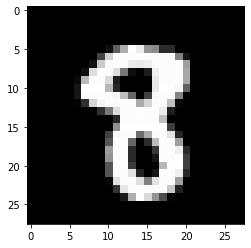

412 9


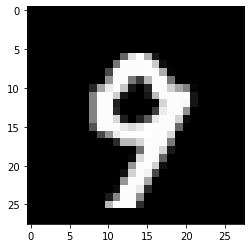

374 3


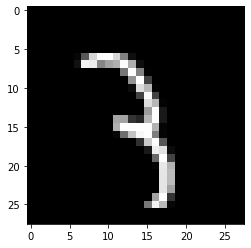

360 4


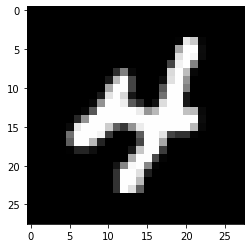

406 8


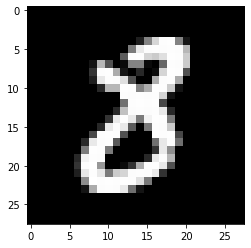

176 1


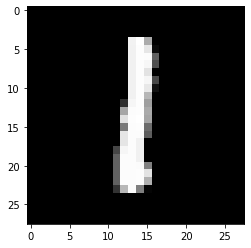

88 5


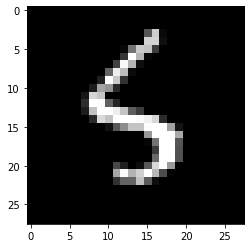

162 8


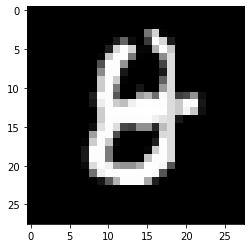

189 0


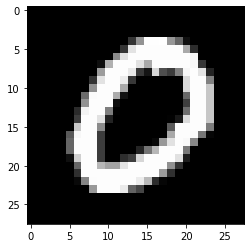

77 8


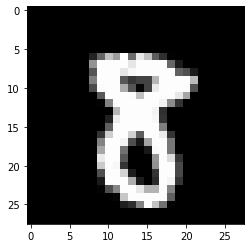

63 8


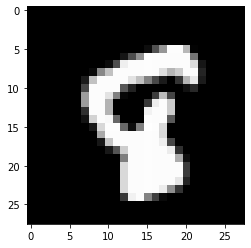

228 2


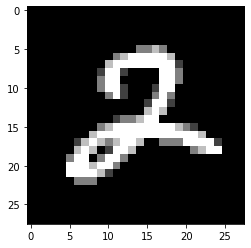

200 9


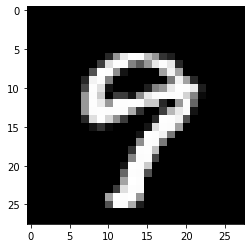

214 3


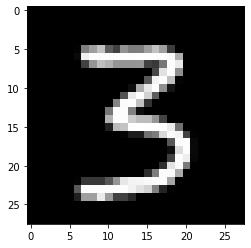

215 0


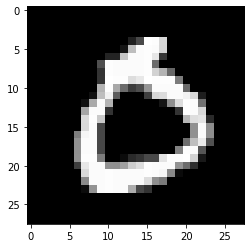

201 0


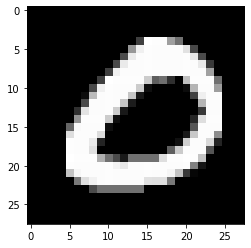

229 2


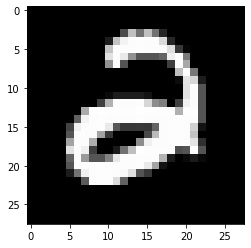

62 3


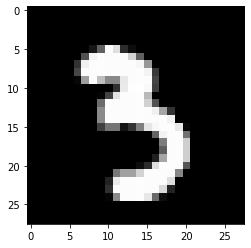

188 8


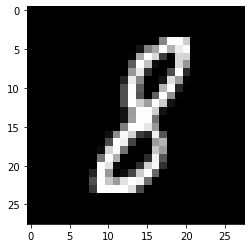

76 5


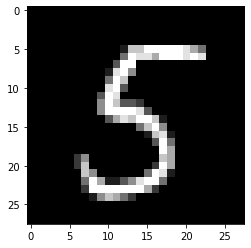

163 4


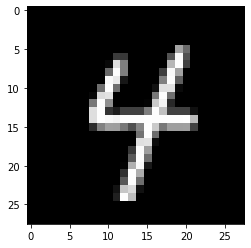

177 1


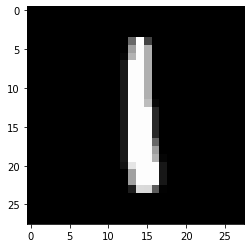

89 9


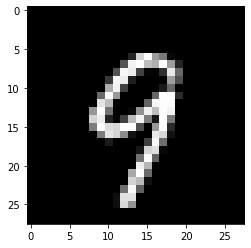

361 9


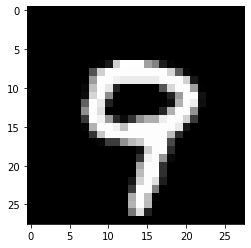

407 4


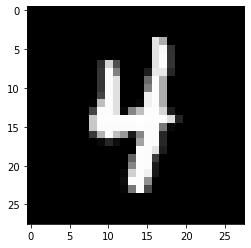

413 2


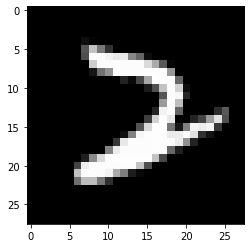

375 5


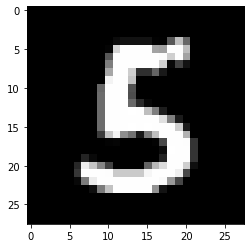

349 5


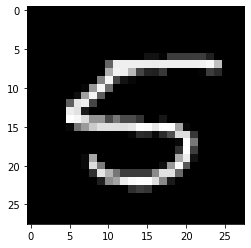

439 4


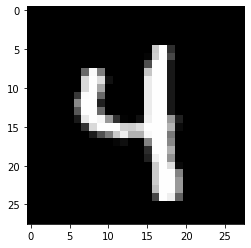

405 2


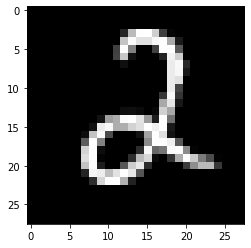

363 9


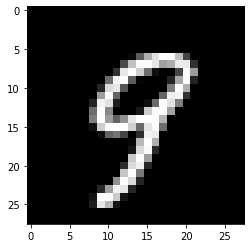

377 0


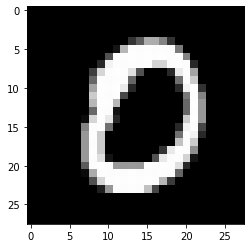

411 5


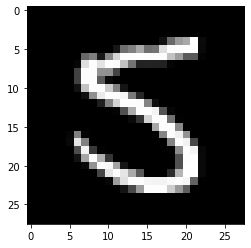

388 7


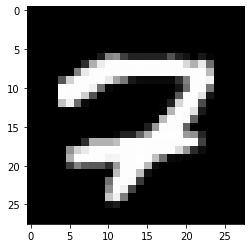

149 9


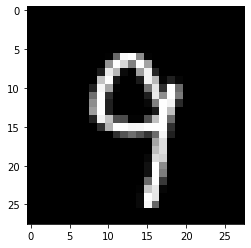

161 1


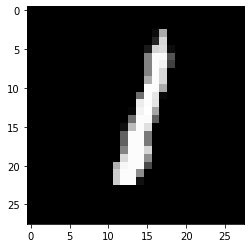

175 4


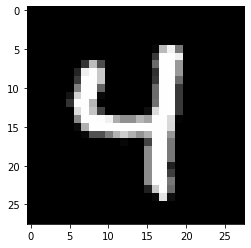

60 4


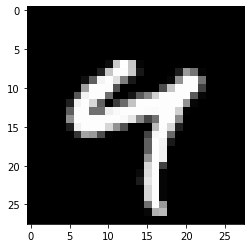

74 5


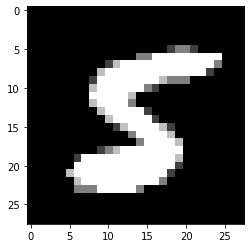

48 8


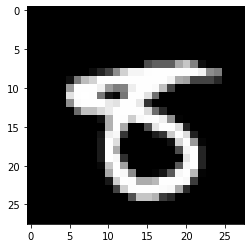

217 3


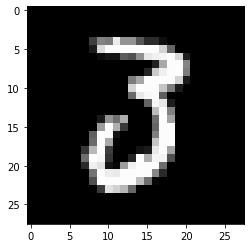

203 6


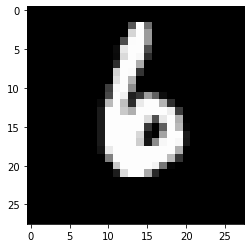

202 9


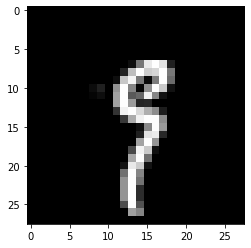

216 7


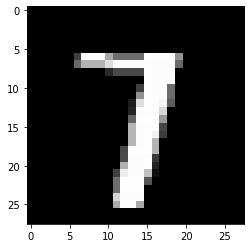

49 0


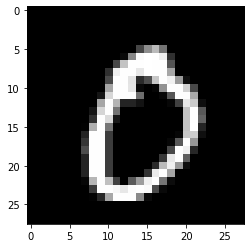

75 9


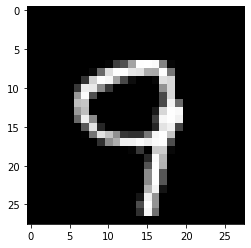

61 1


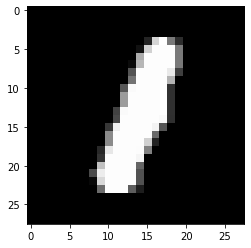

174 8


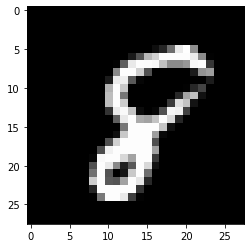

160 6


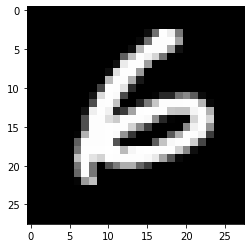

148 4


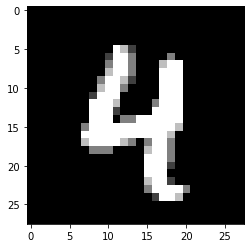

389 2


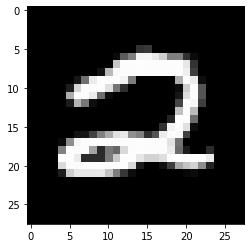

376 0


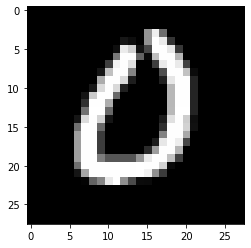

410 2


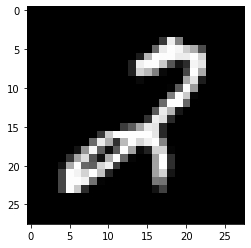

404 1


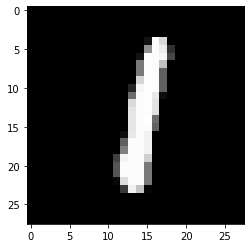

362 9


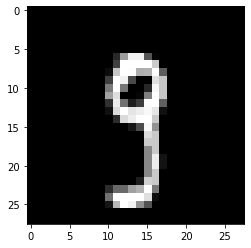

438 6


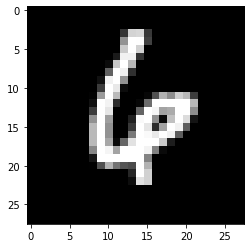

366 5


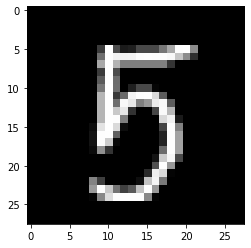

400 1


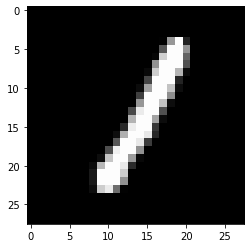

414 8


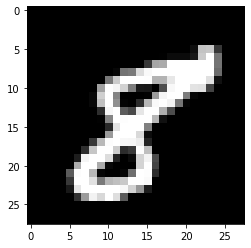

372 9


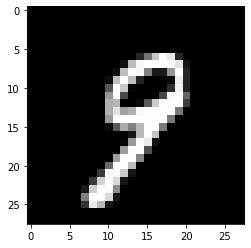

428 1


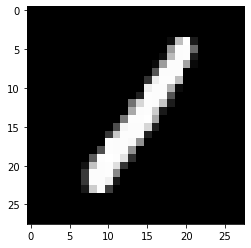

399 3


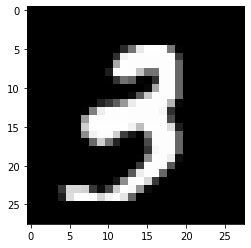

164 0


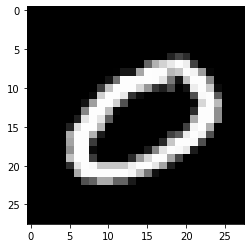

170 6


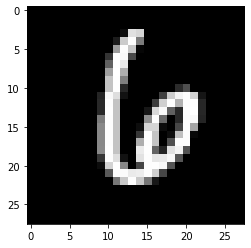

158 8


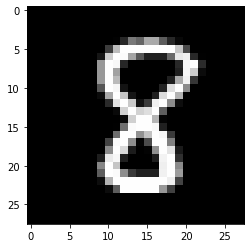

59 1


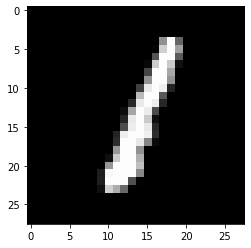

65 0


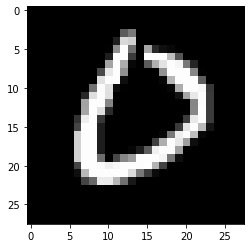

71 4


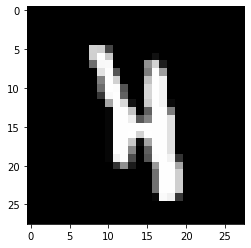

212 8


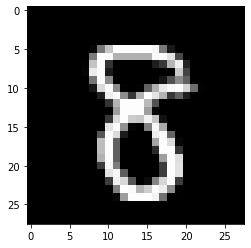

206 2


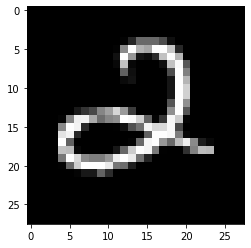

207 5


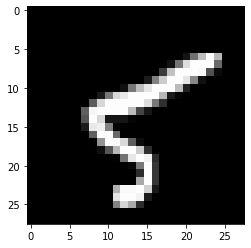

213 6


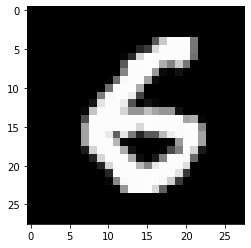

70 8


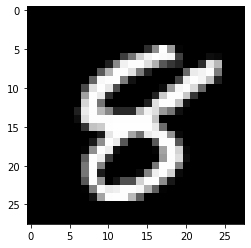

64 1


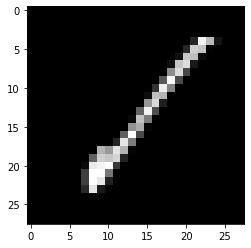

58 9


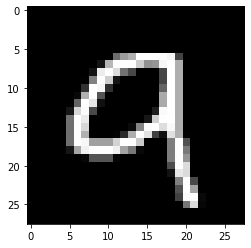

159 2


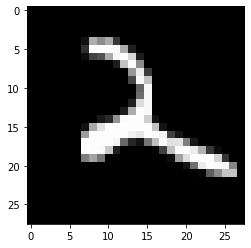

171 8


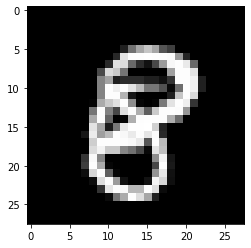

165 7


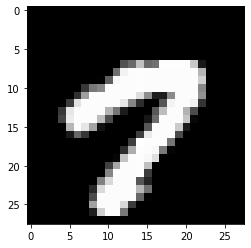

398 3


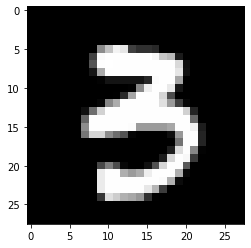

429 1


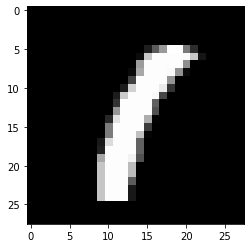

415 7


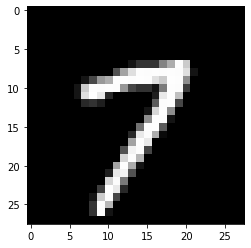

373 6


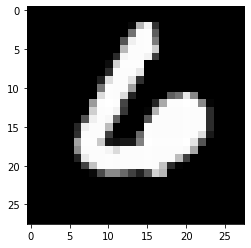

367 1


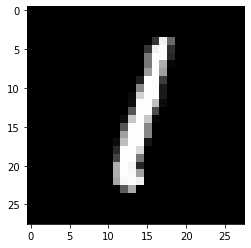

401 7


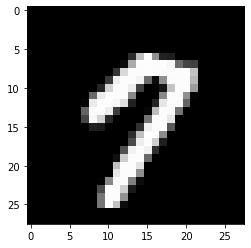

371 4


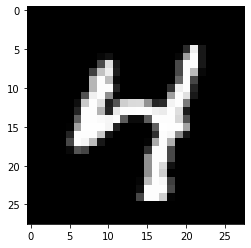

417 2


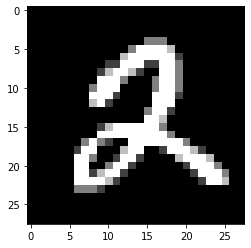

403 7


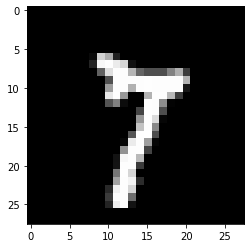

365 8


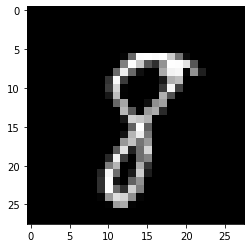

359 0


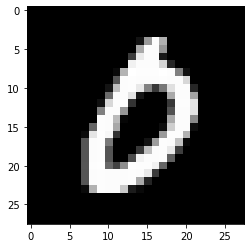

173 0


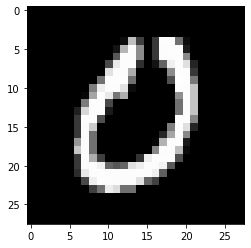

167 7


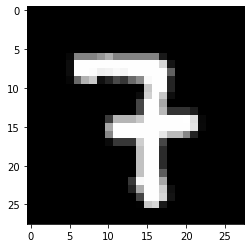

99 6


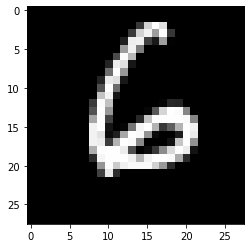

8 6


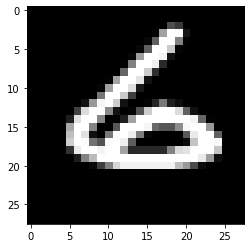

72 7


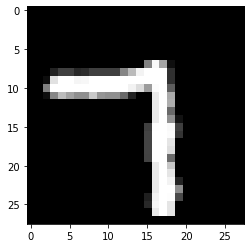

198 3


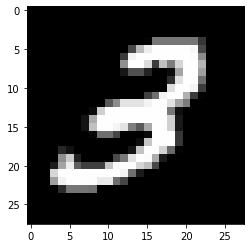

66 7


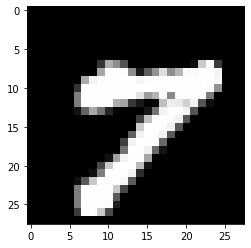

205 5


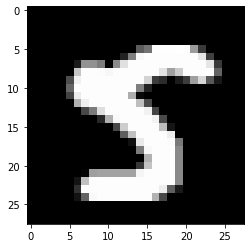

211 2


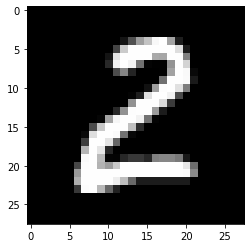

239 9


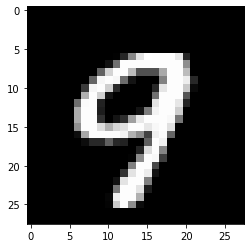

238 6


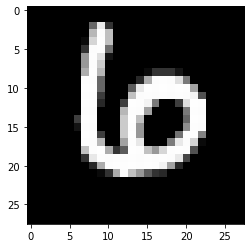

210 9


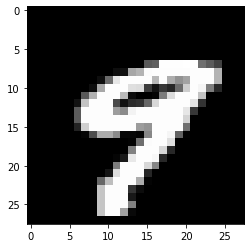

204 5


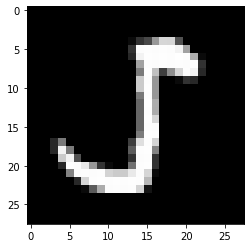

199 5


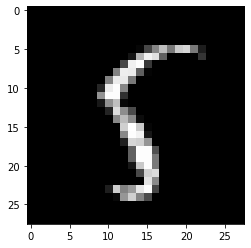

67 7


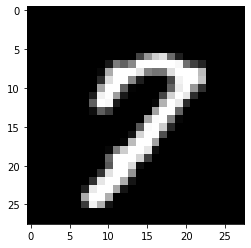

73 1


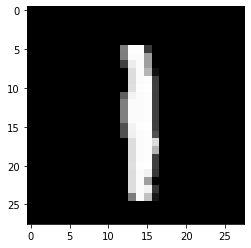

9 6


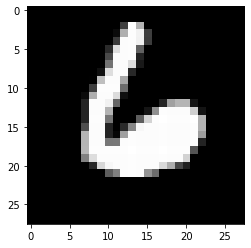

166 2


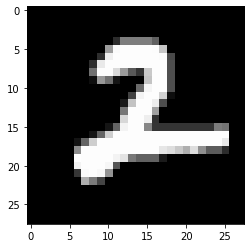

98 1


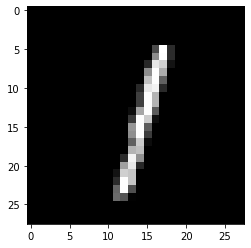

172 2


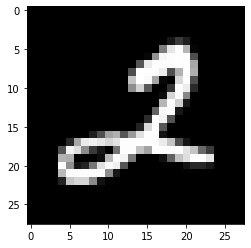

358 2


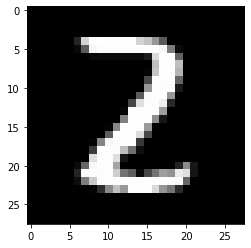

402 3


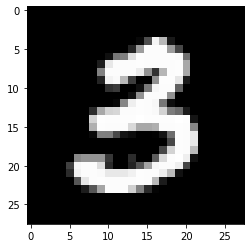

364 3


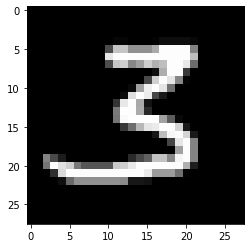

370 4


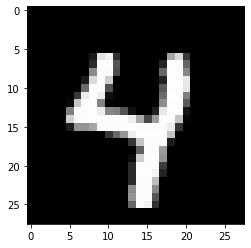

416 9


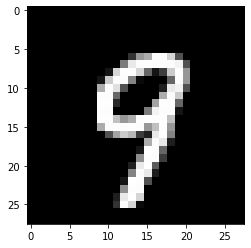

459 4


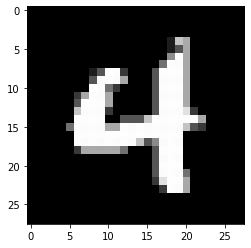

317 0


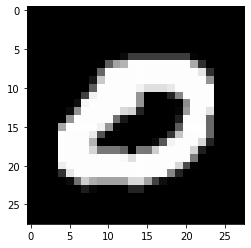

471 4


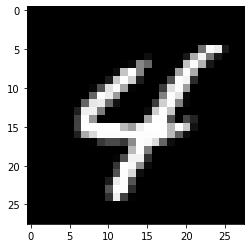

465 6


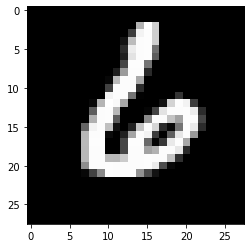

303 5


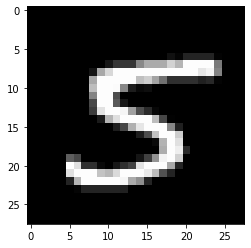

129 5


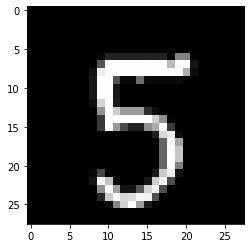

115 4


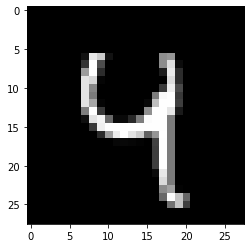

101 2


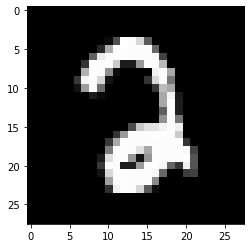

14 2


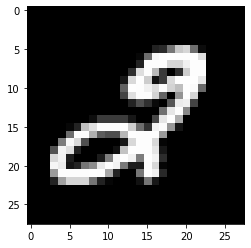

28 6


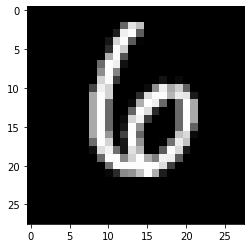

263 3


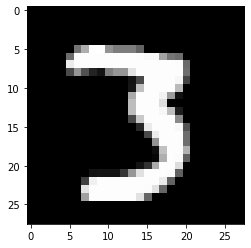

277 3


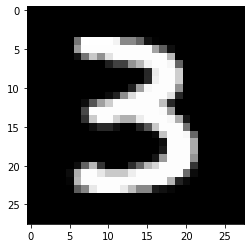

288 8


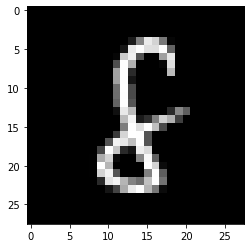

289 8


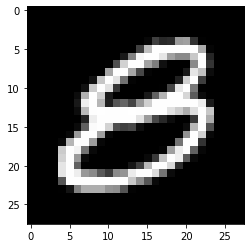

276 4


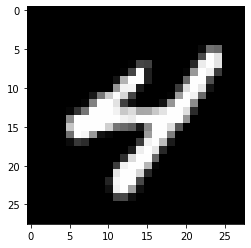

262 6


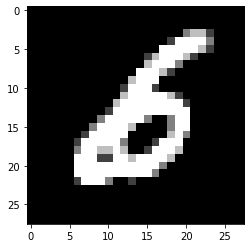

29 7


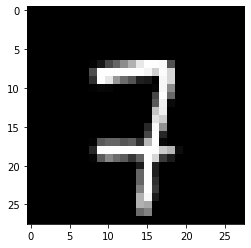

15 1


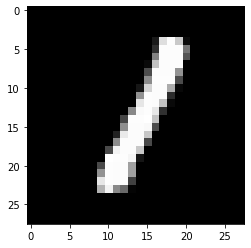

100 1


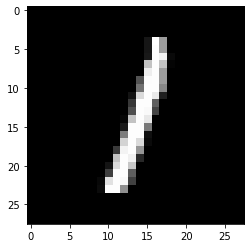

114 4


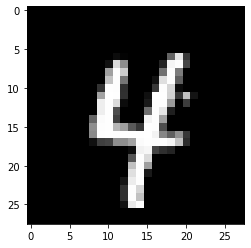

128 3


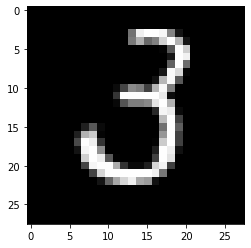

464 2


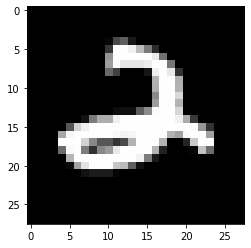

302 1


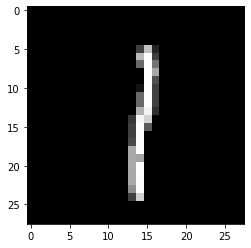

316 6


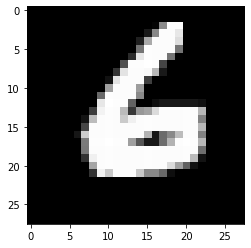

470 6


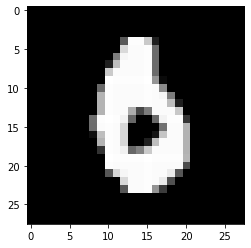

458 2


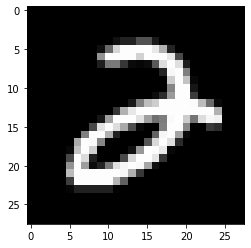

328 3


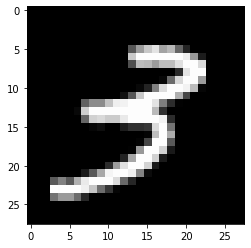

300 7


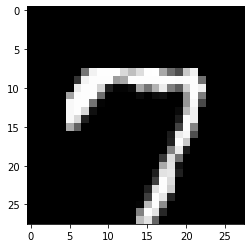

466 3


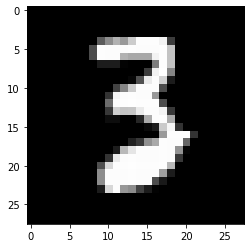

472 7


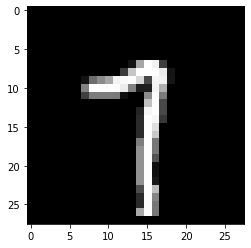

314 3


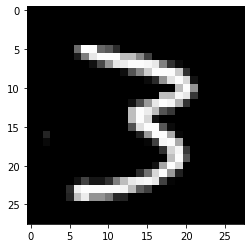

499 5


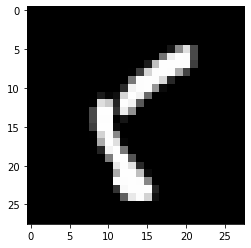

102 3


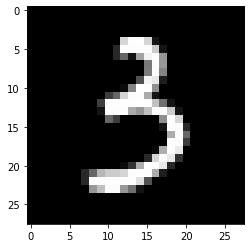

116 6


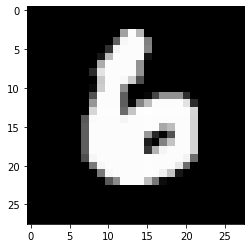

17 4


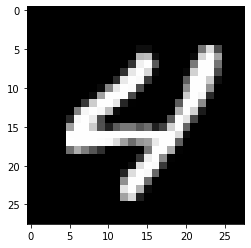

248 6


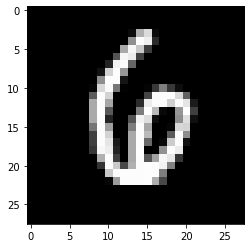

274 5


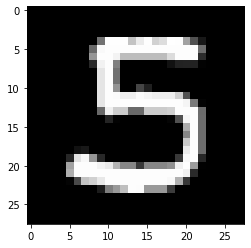

260 8


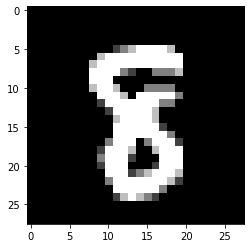

261 7


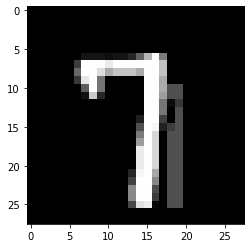

275 3


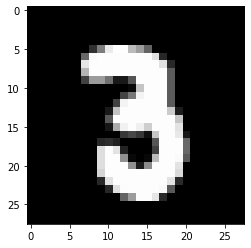

249 9


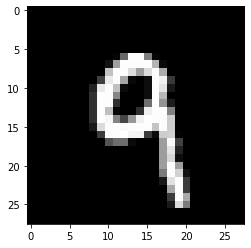

16 7


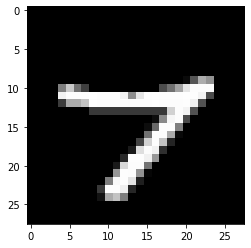

117 9


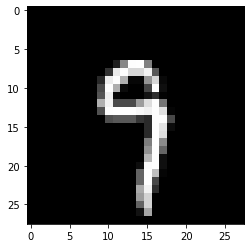

103 3


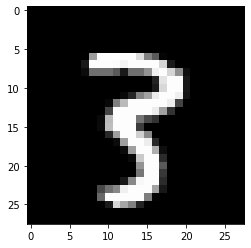

498 5


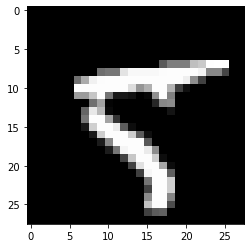

473 8


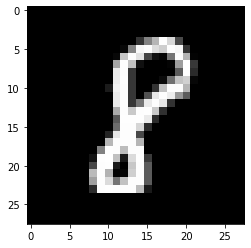

315 3


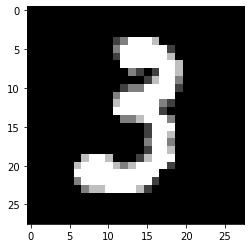

301 3


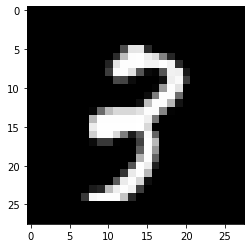

467 2


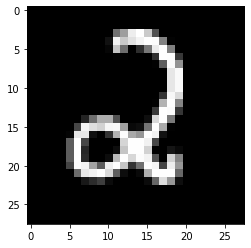

329 1


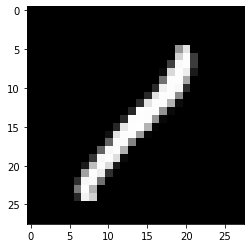

463 2


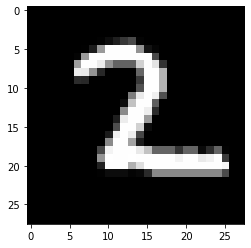

305 7


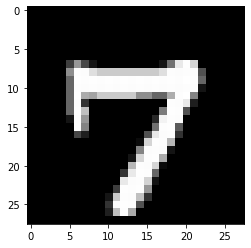

311 1


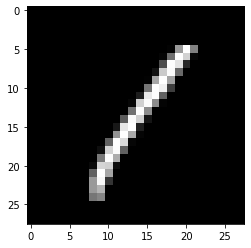

477 2


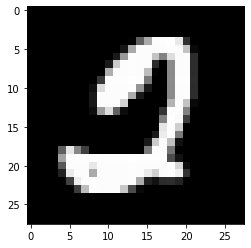

339 7


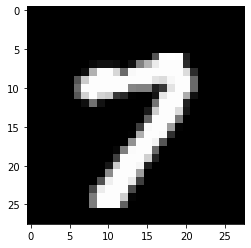

488 0


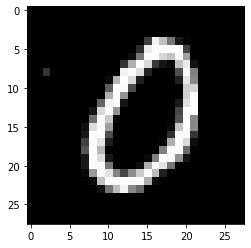

107 6


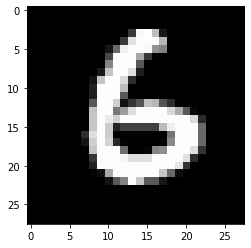

113 7


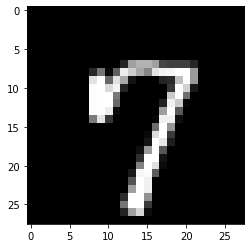

12 5


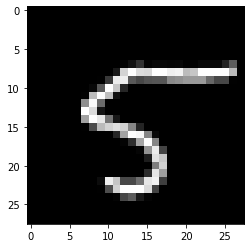

271 4


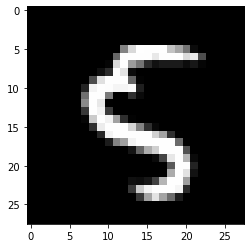

265 8


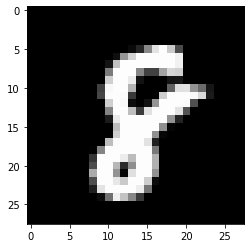

259 8


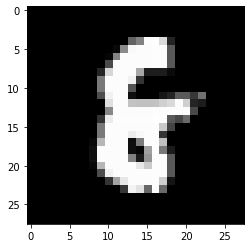

258 6


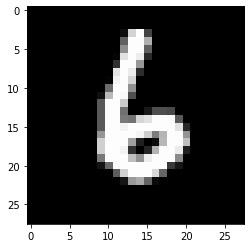

264 9


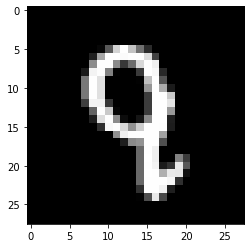

270 6


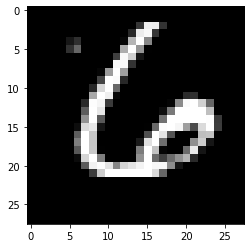

13 4


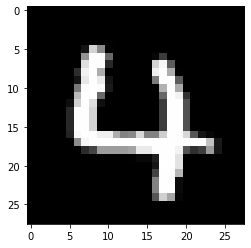

112 6


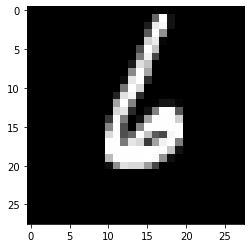

106 5


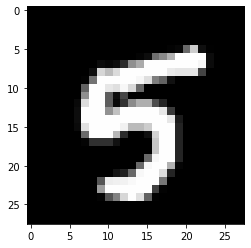

489 8


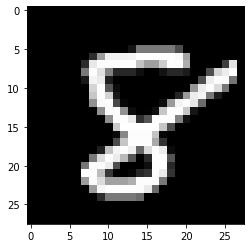

338 7


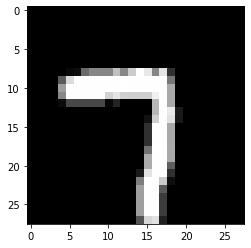

310 9


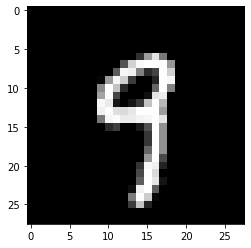

476 9


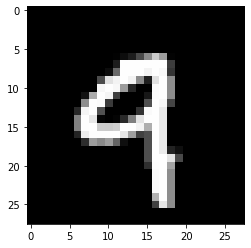

462 0


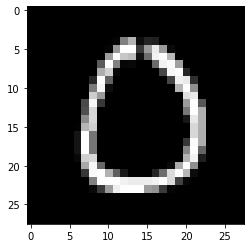

304 4


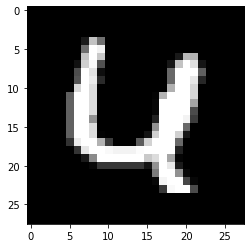

474 6


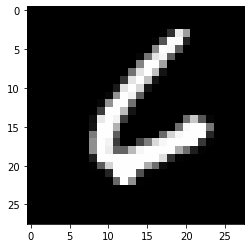

312 7


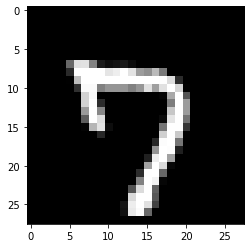

306 4


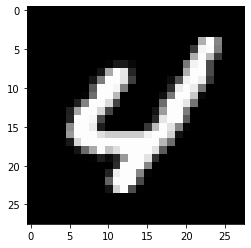

460 8


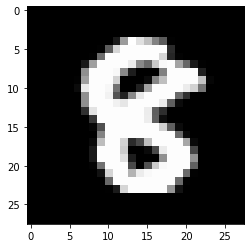

448 9


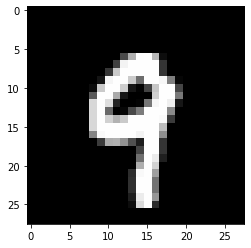

110 0


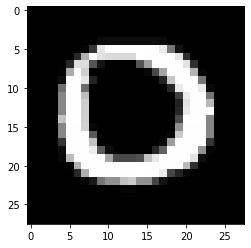

104 4


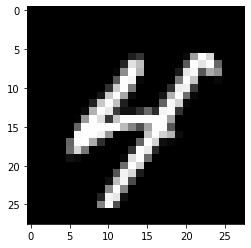

138 6


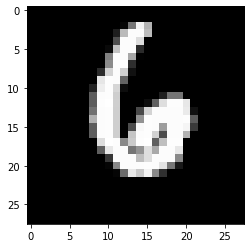

39 4


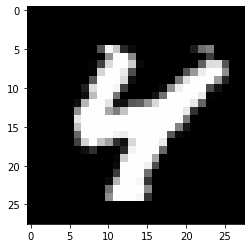

11 3


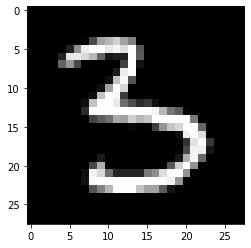

266 3


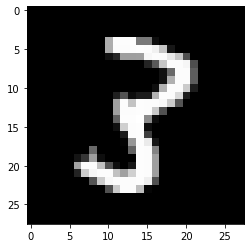

272 9


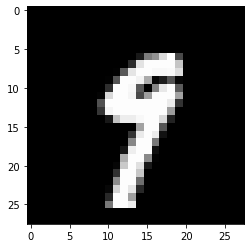

299 5


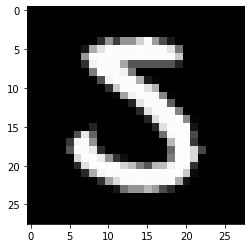

298 1


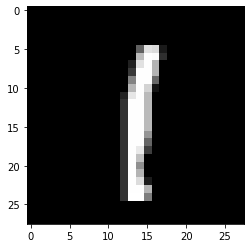

273 8


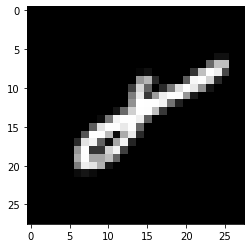

267 6


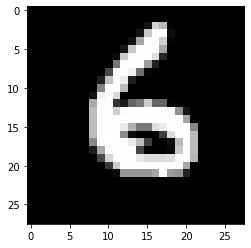

10 1


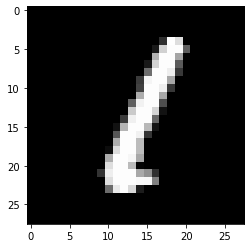

38 3


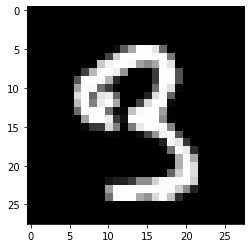

139 1


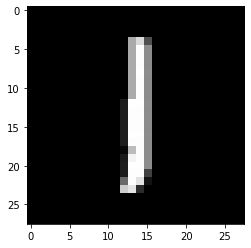

105 3


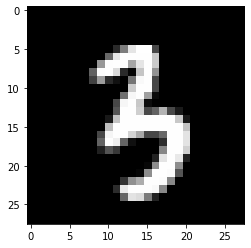

111 0


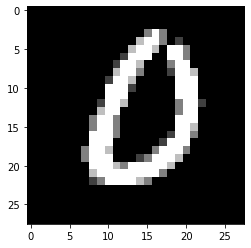

449 1


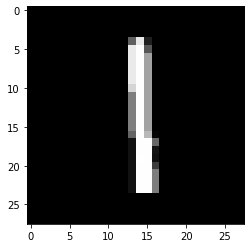

307 6


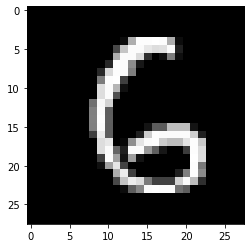

461 7


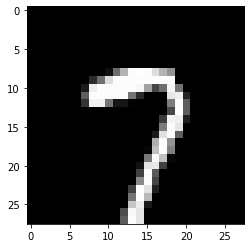

475 7


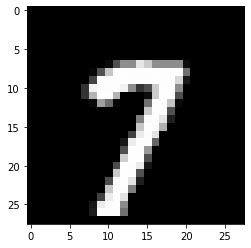

313 9


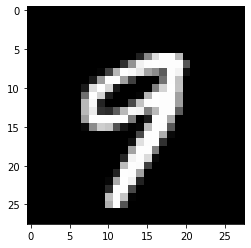

478 2


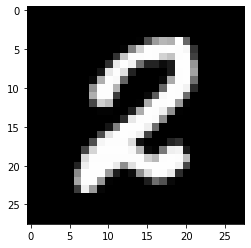

336 5


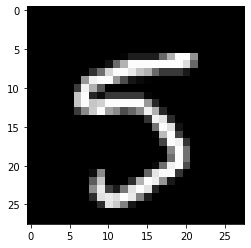

450 9


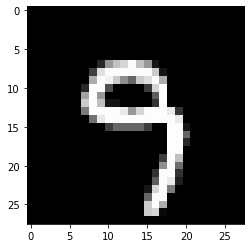

444 2


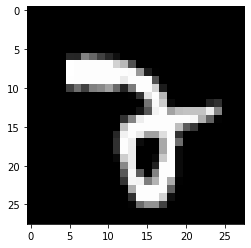

322 2


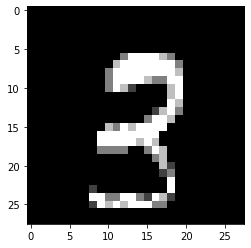

493 9


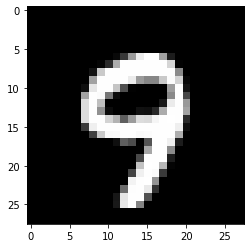

487 0


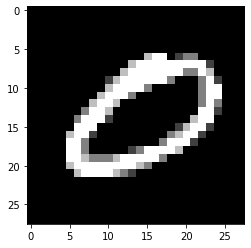

108 3


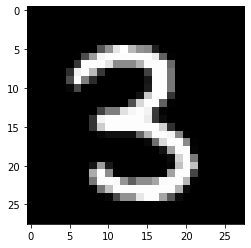

134 9


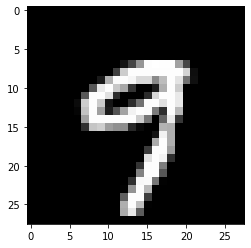

120 9


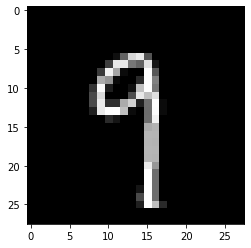

35 6


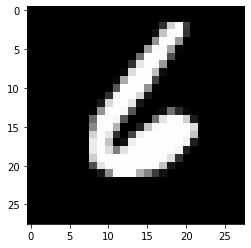

21 9


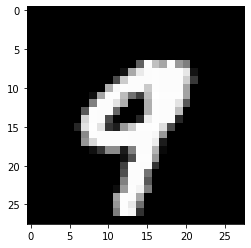

242 5


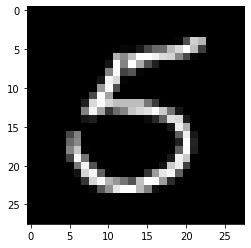

256 2


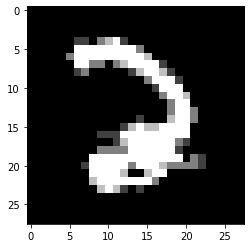

281 8


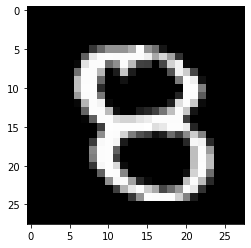

295 5


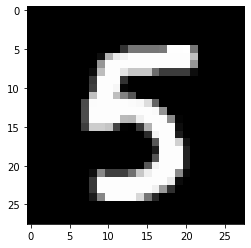

294 4


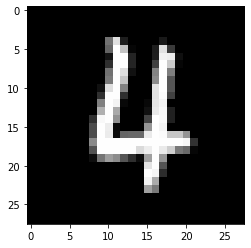

280 3


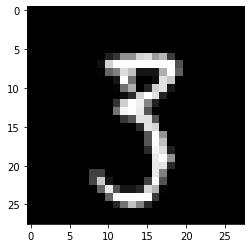

257 4


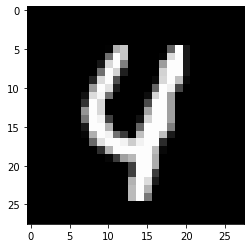

243 5


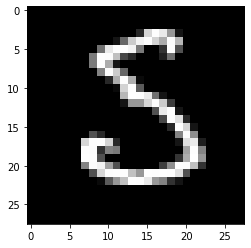

20 7


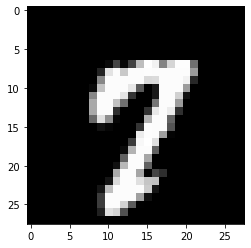

34 2


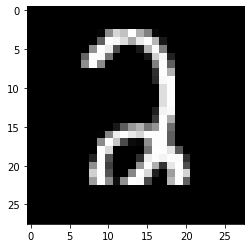

121 1


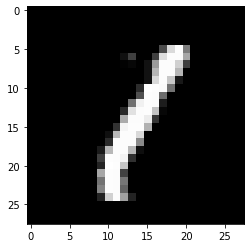

135 9


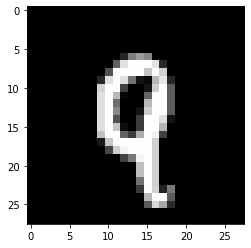

109 9


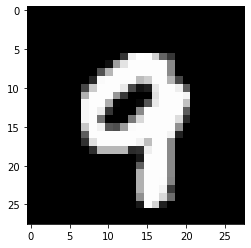

486 1


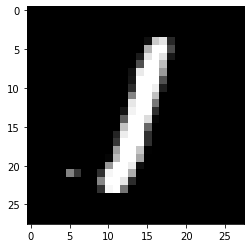

492 2


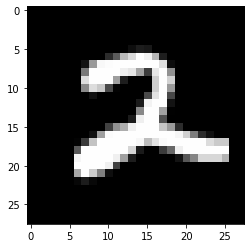

445 0


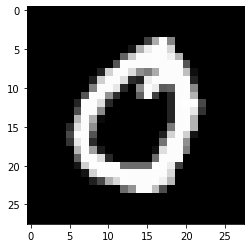

323 8


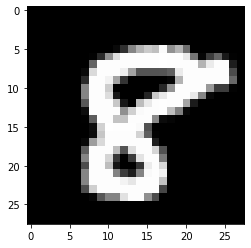

337 7


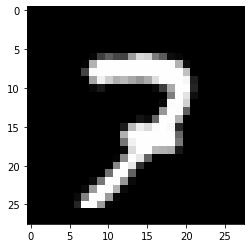

451 8


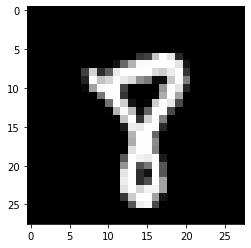

479 5


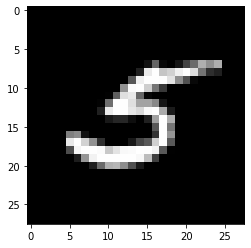

309 8


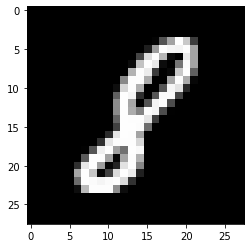

321 7


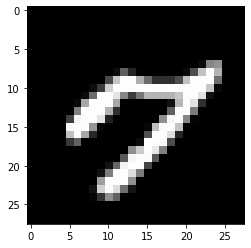

447 7


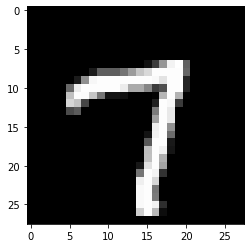

453 1


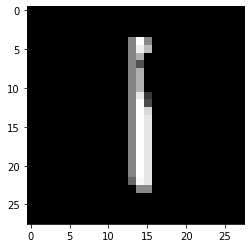

335 9


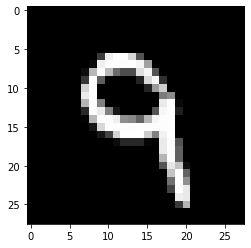

484 3


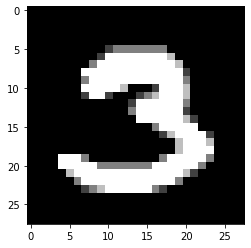

490 5


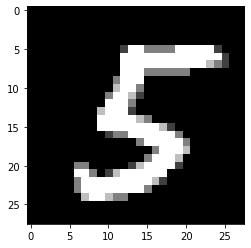

123 8


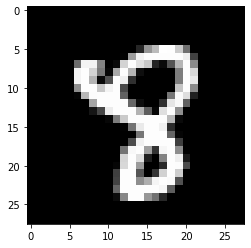

137 0


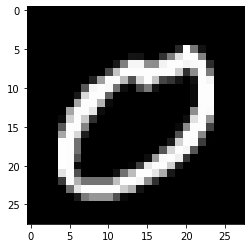

22 5


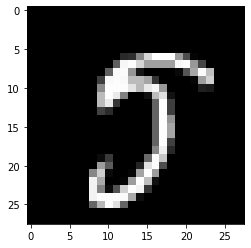

36 7


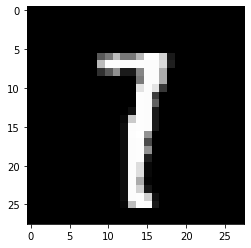

269 8


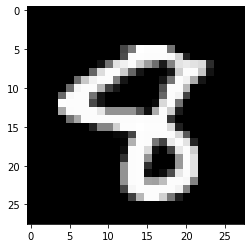

255 6


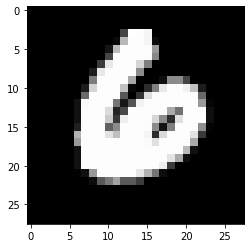

241 8


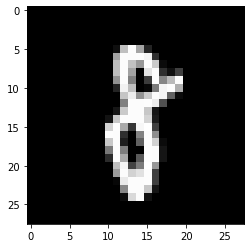

296 5


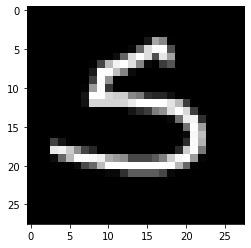

282 7


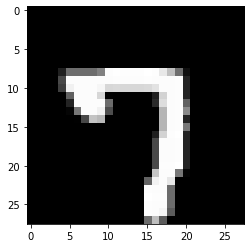

283 0


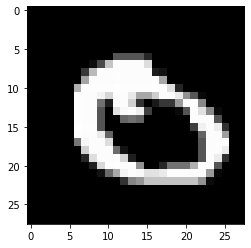

297 8


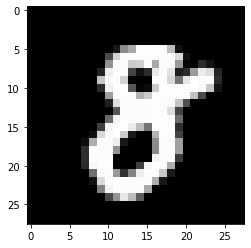

240 5


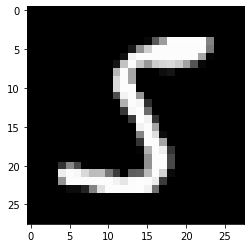

254 2


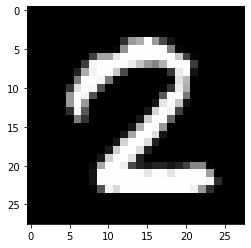

268 2


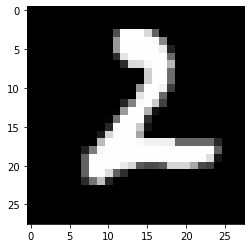

37 6


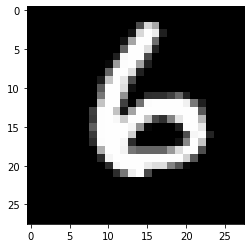

23 5


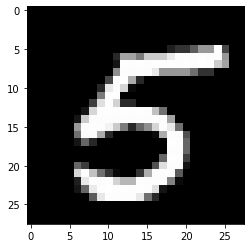

136 0


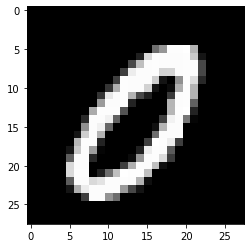

122 2


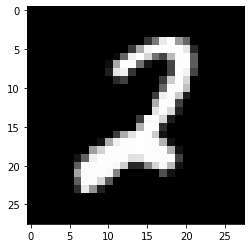

491 5


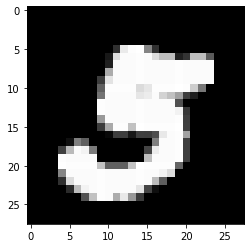

485 8


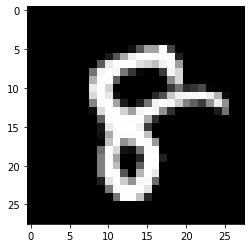

452 5


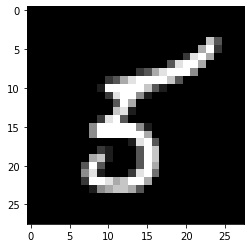

334 3


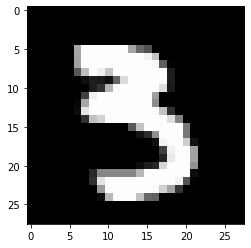

320 2


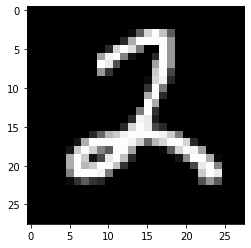

446 5


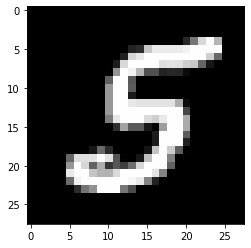

308 0


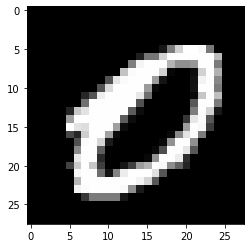

442 2


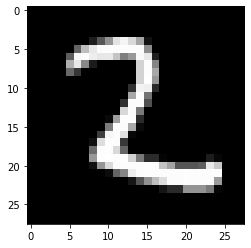

324 2


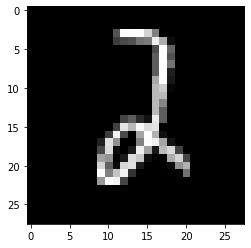

330 5


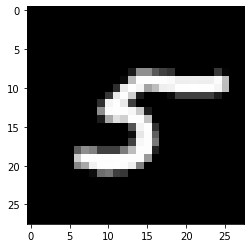

456 5


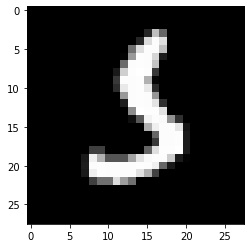

318 2


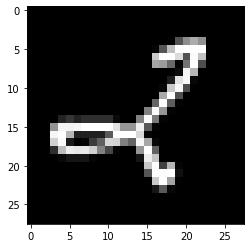

481 1


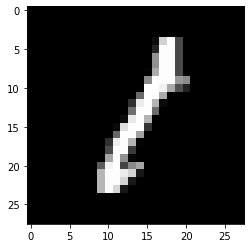

495 6


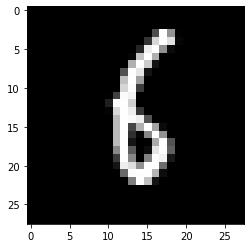

126 4


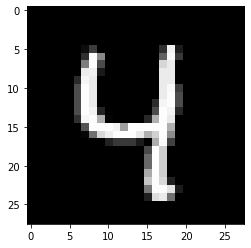

132 8


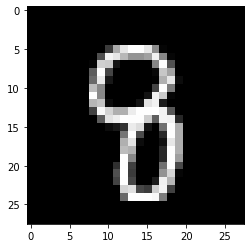

27 9


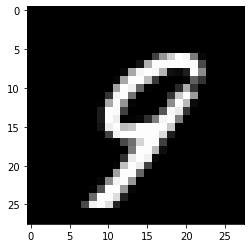

33 7


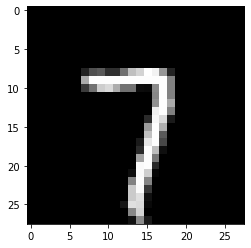

250 4


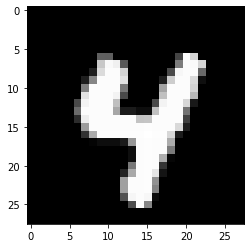

244 4


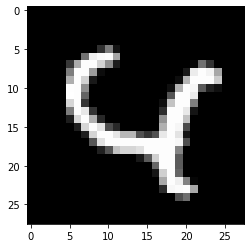

278 9


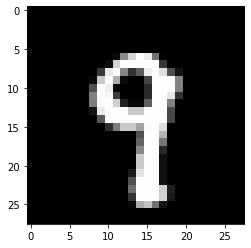

293 4


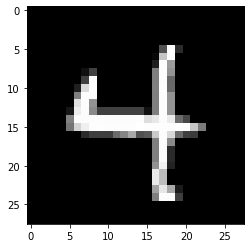

287 7


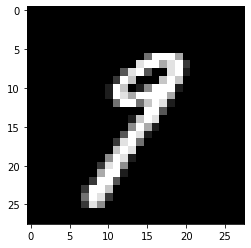

286 2


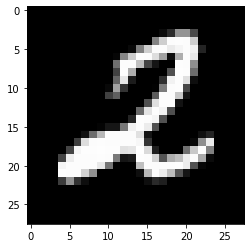

292 4


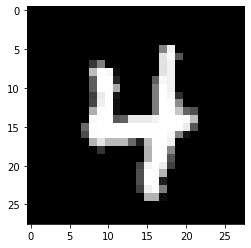

279 3


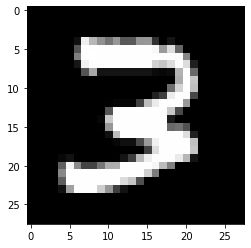

245 7


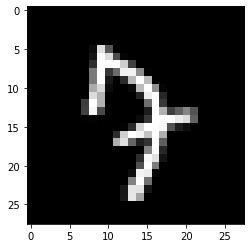

251 1


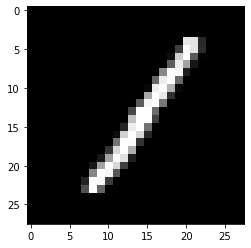

32 9


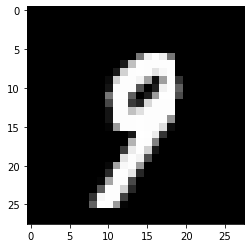

26 2


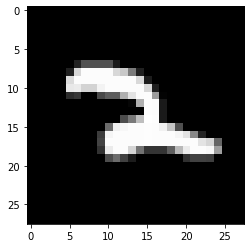

133 2


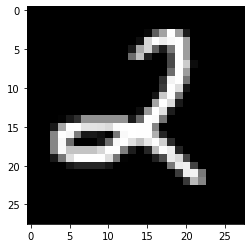

127 6


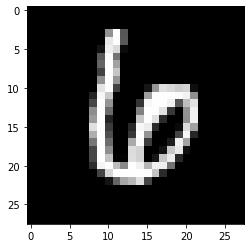

494 8


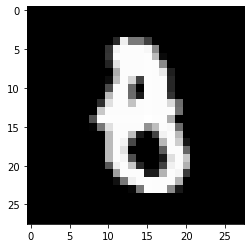

480 2


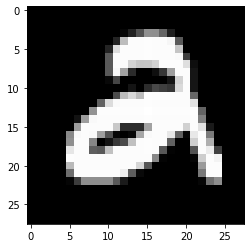

319 5


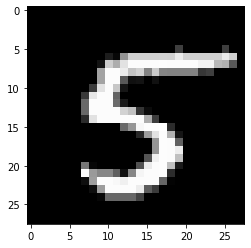

331 9


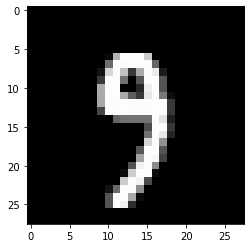

457 4


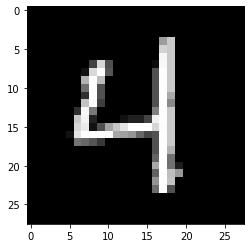

443 1


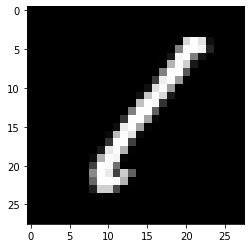

325 3


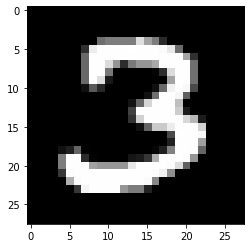

455 3


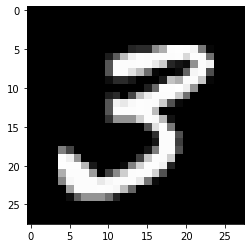

333 1


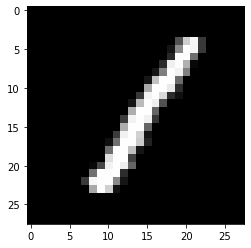

327 2


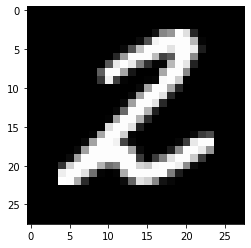

441 8


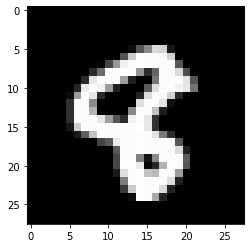

469 2


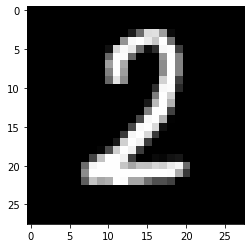

496 4


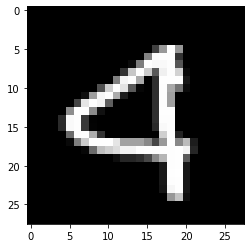

482 6


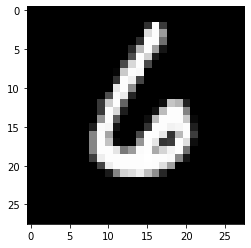

131 2


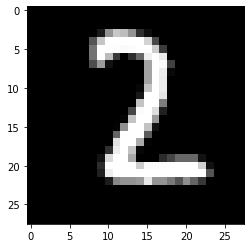

125 1


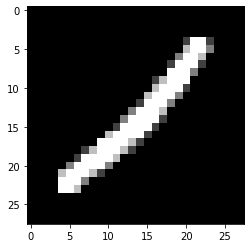

119 0


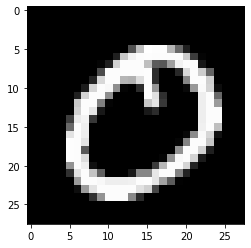

18 3


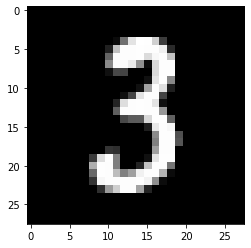

30 1


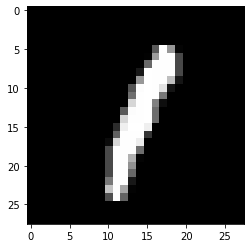

24 3


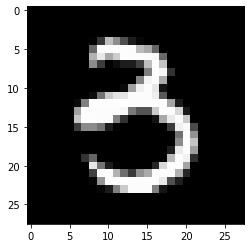

247 1


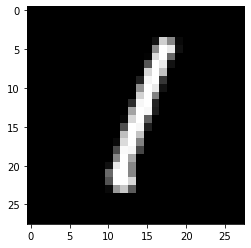

253 8


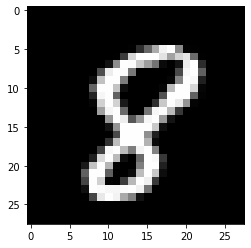

284 3


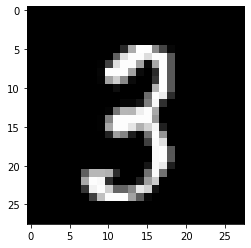

290 0


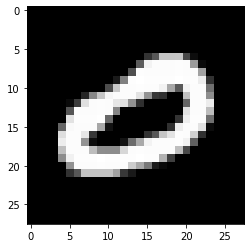

291 3


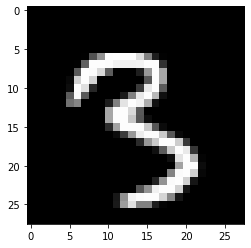

285 0


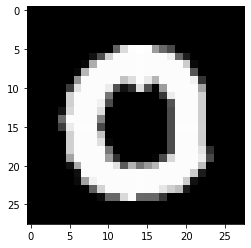

252 3


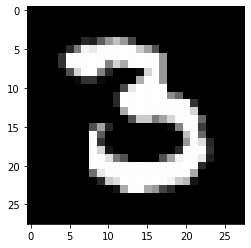

246 4


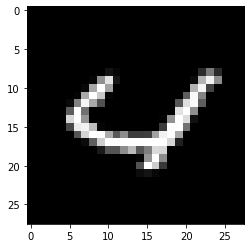

25 4


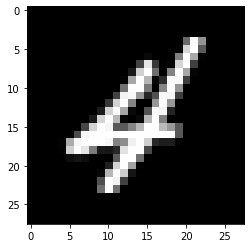

31 2


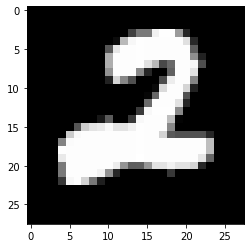

19 1


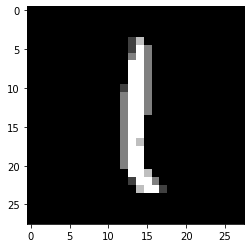

118 7


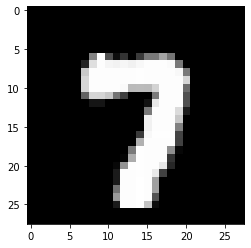

124 0


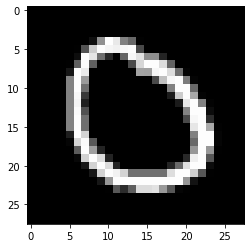

130 4


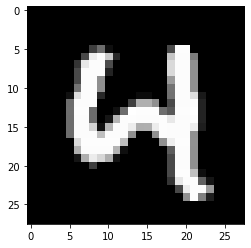

483 3


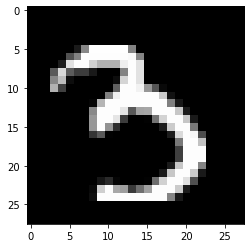

497 4


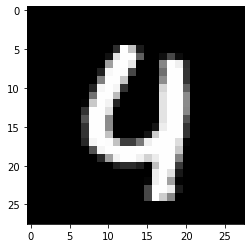

468 1


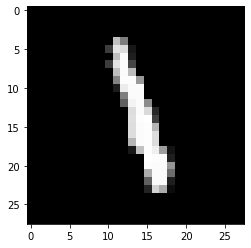

326 6


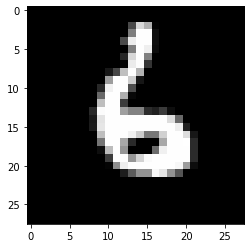

440 4


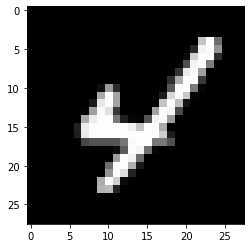

454 1


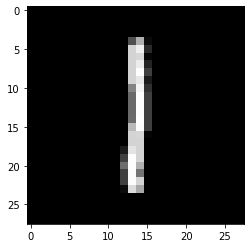

332 1


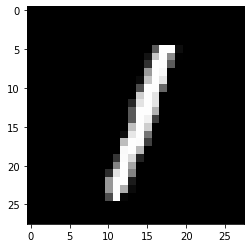

369 2


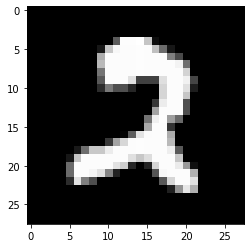

433 9


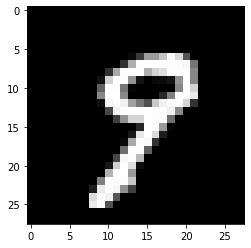

355 4


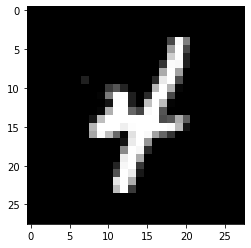

341 1


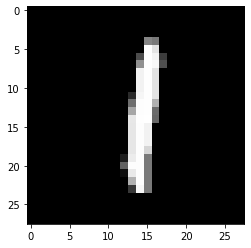

427 8


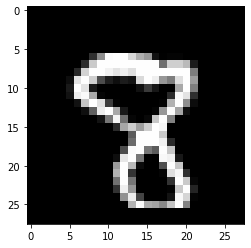

396 5


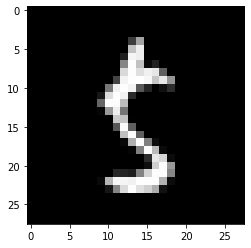

382 7


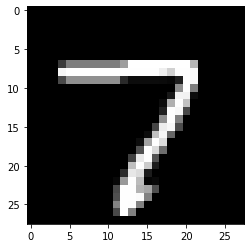

95 6


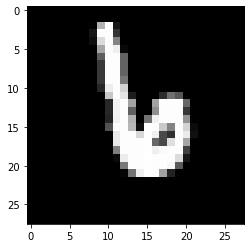

81 6


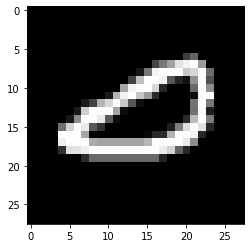

157 2


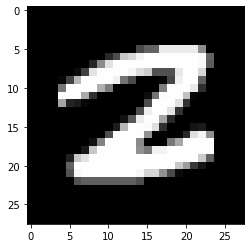

143 3


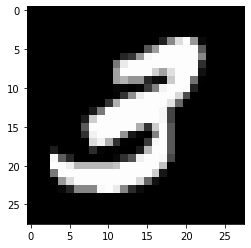

4 9


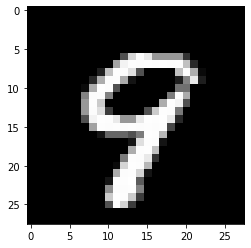

56 9


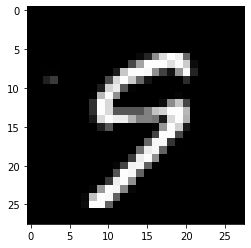

42 4


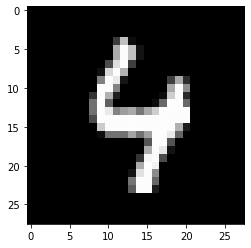

194 6


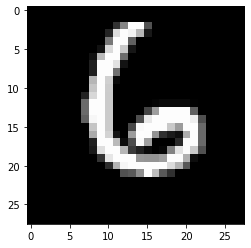

180 0


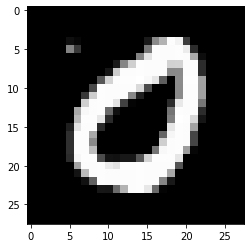

209 5


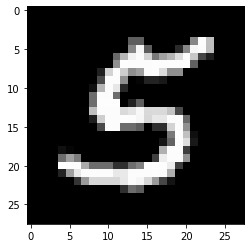

221 1


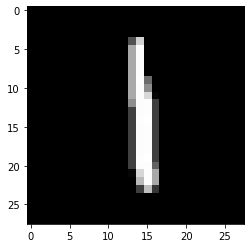

235 6


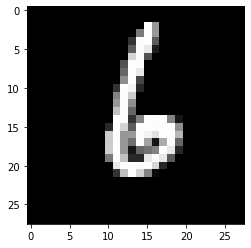

234 2


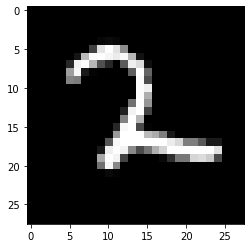

220 0


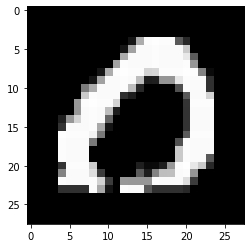

208 7


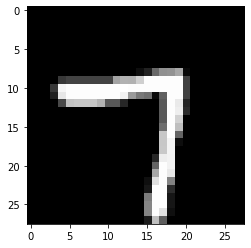

181 2


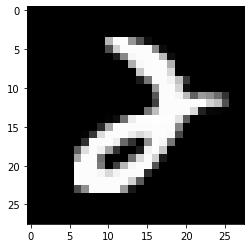

195 7


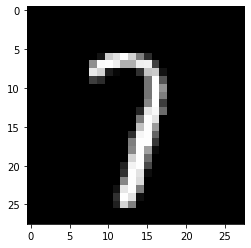

43 9


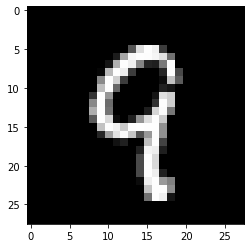

5 5


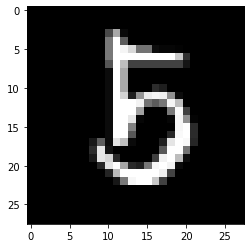

57 1


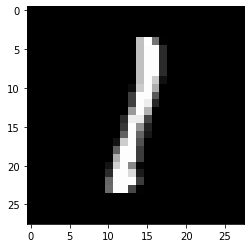

142 0


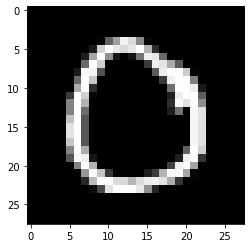

156 9


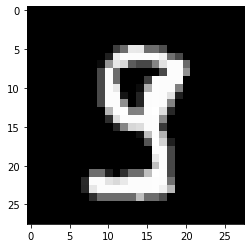

80 7


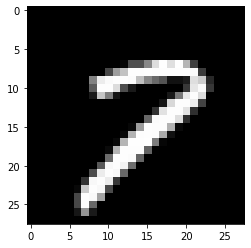

94 8


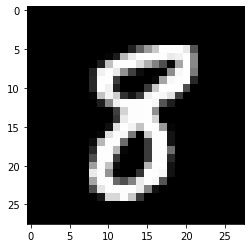

383 3


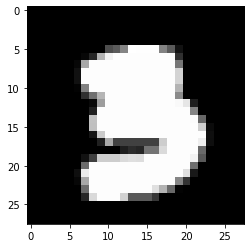

397 3


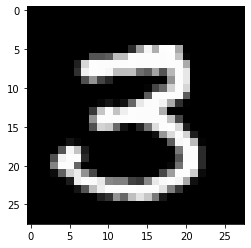

340 5


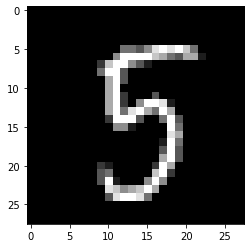

426 1


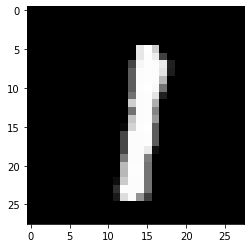

432 2


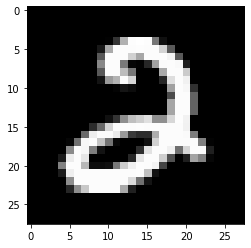

354 6


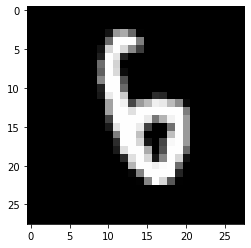

368 0


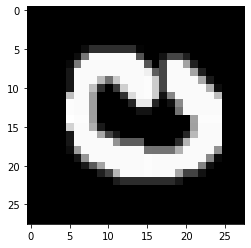

418 8


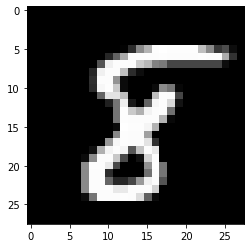

424 1


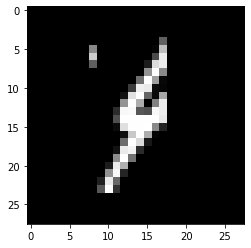

342 3


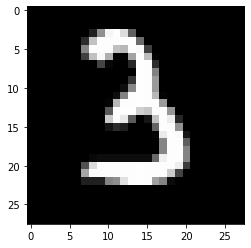

356 6


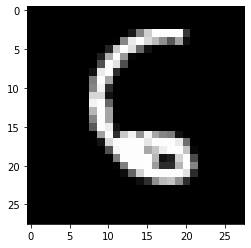

430 1


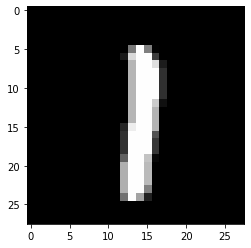

381 3


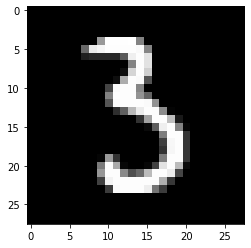

395 0


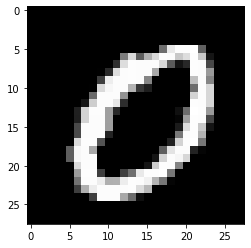

82 0


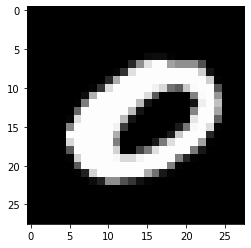

96 0


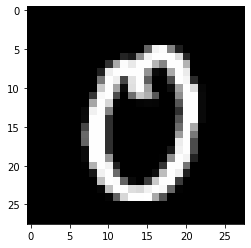

168 9


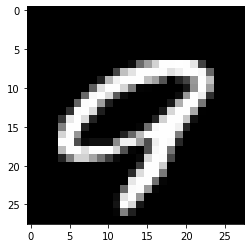

140 2


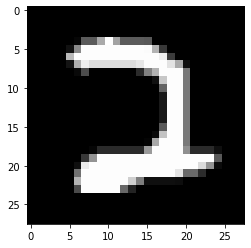

154 2


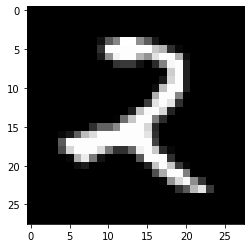

41 1


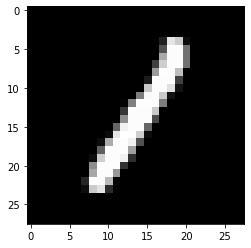

55 9


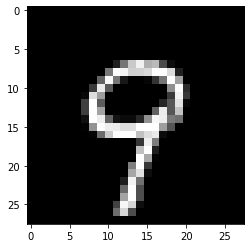

7 9


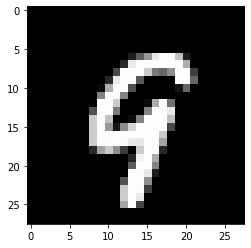

183 2


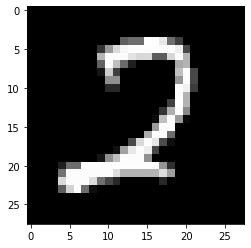

69 2


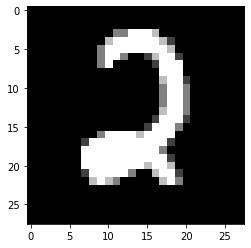

197 3


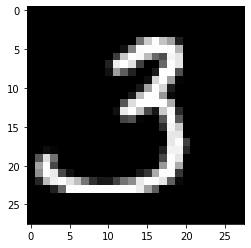

236 3


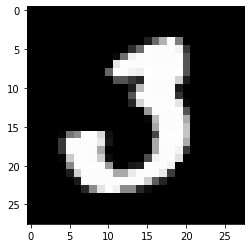

222 5


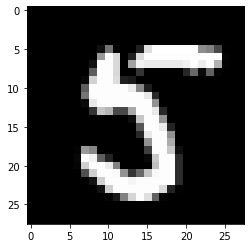

223 3


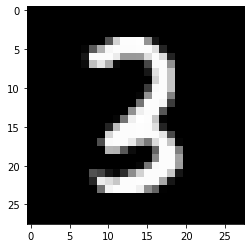

237 1


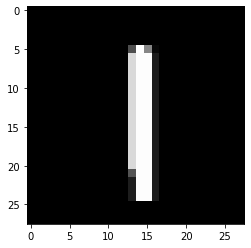

68 8


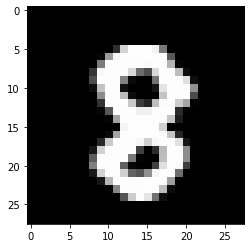

196 4


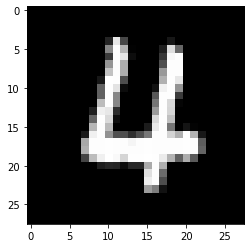

182 8


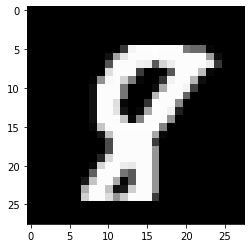

54 3


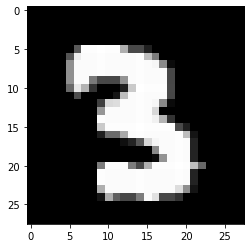

6 8


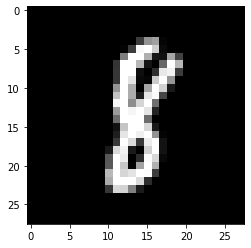

40 2


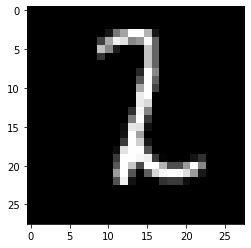

155 6


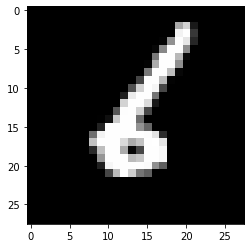

141 0


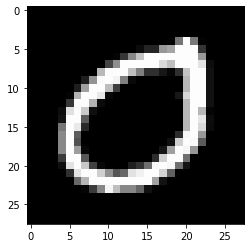

97 5


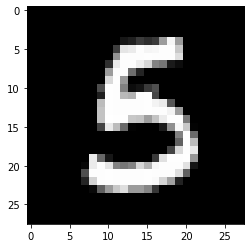

169 9


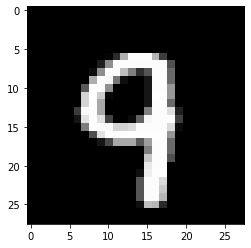

83 0


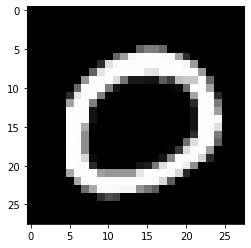

394 0


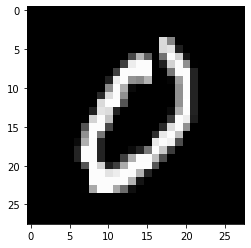

380 0


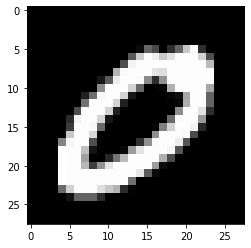

357 9


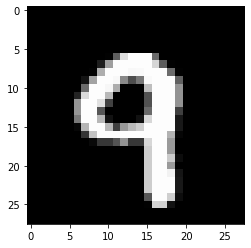

431 1


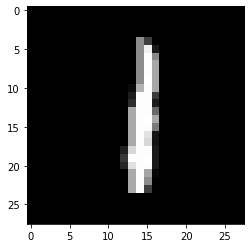

425 6


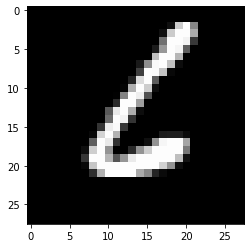

343 3


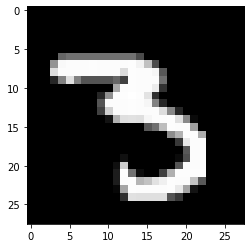

419 1


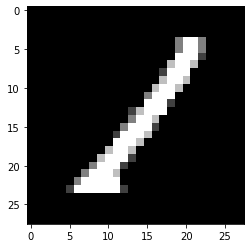

347 4


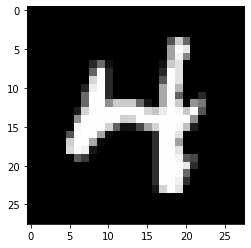

421 8


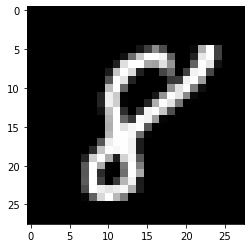

435 8


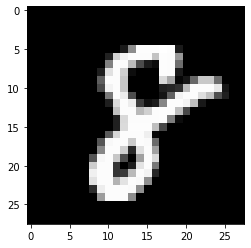

353 4


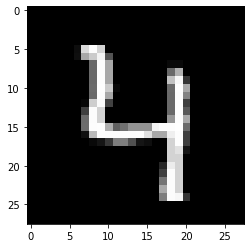

409 7


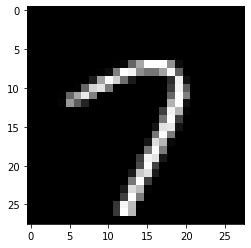

384 7


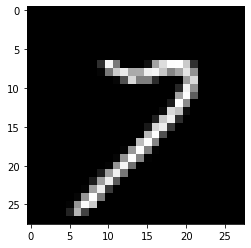

390 1


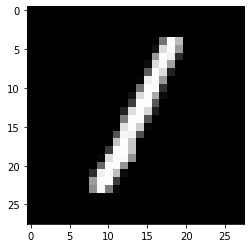

145 1


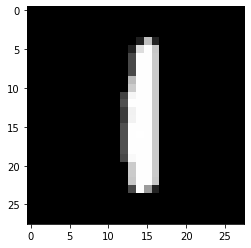

151 9


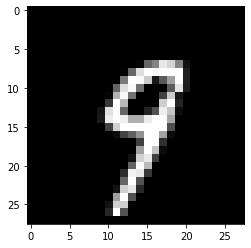

87 5


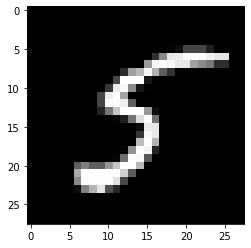

179 0


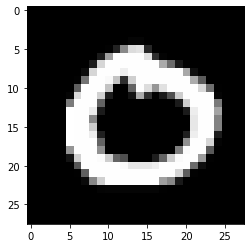

93 5


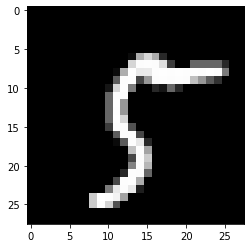

78 5


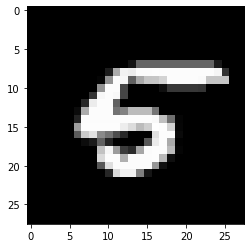

186 0


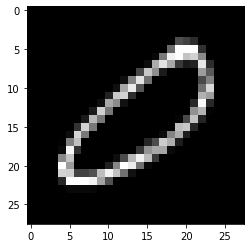

192 4


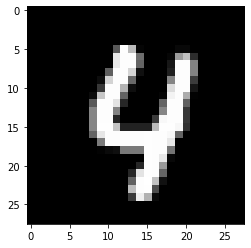

44 6


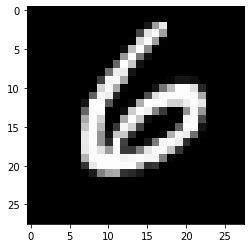

2 1


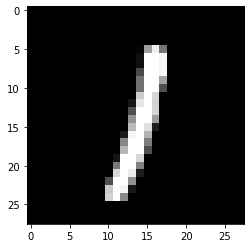

50 8


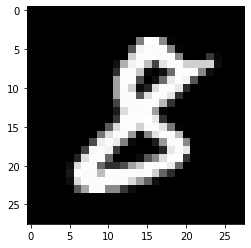

233 4


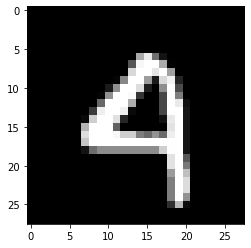

227 5


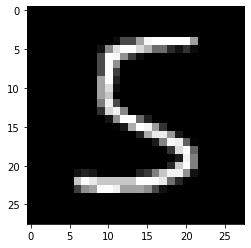

226 6


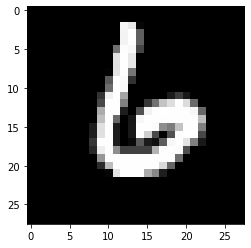

232 7


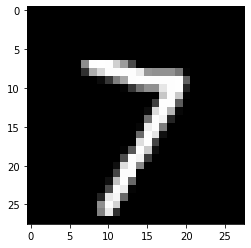

3 3


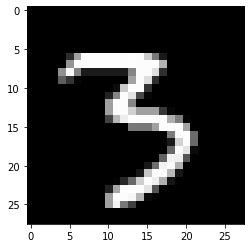

51 7


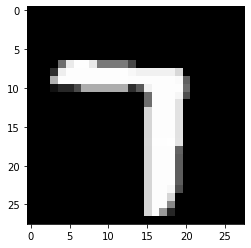

45 4


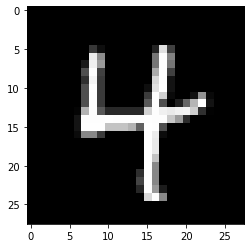

193 8


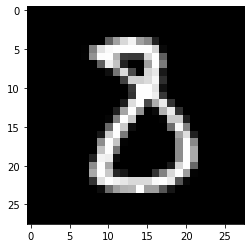

79 8


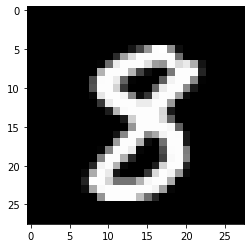

187 1


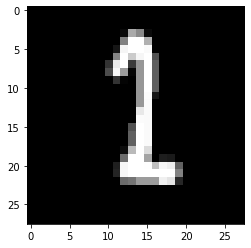

92 0


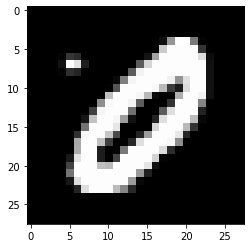

86 9


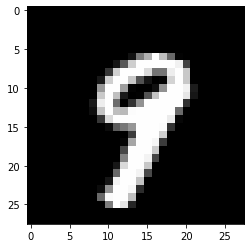

178 6


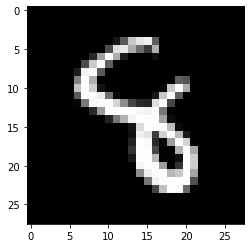

150 4


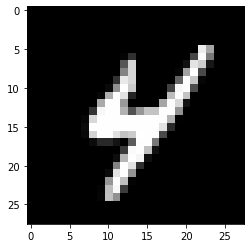

144 2


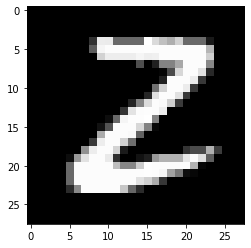

391 8


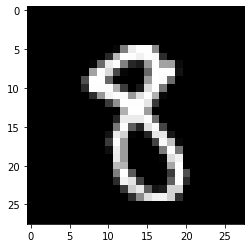

385 0


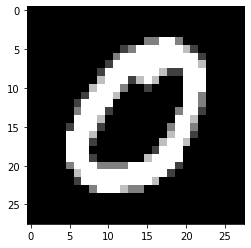

408 2


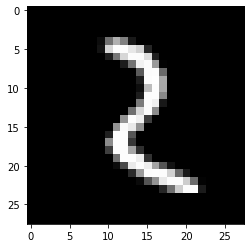

434 3


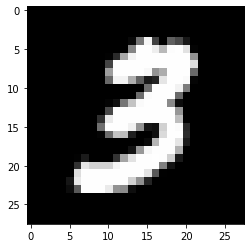

352 7


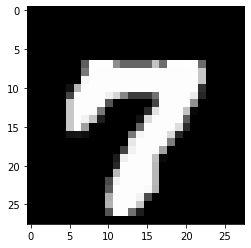

346 7


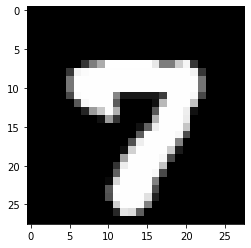

420 4


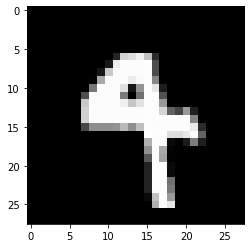

350 5


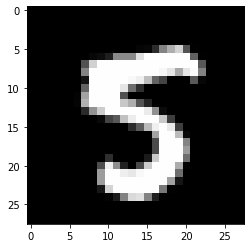

436 5


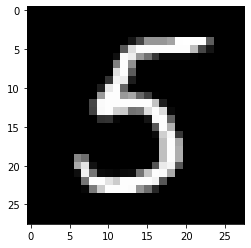

422 7


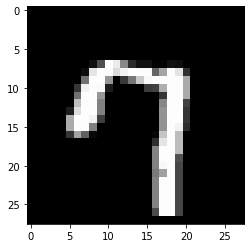

344 5


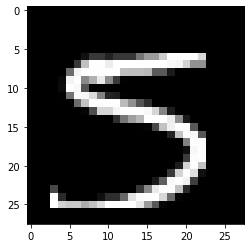

378 7


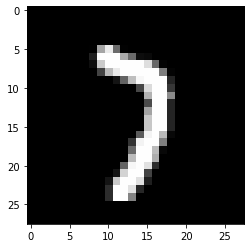

393 5


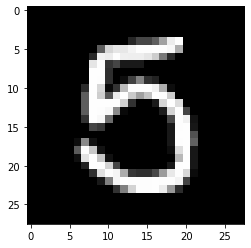

387 4


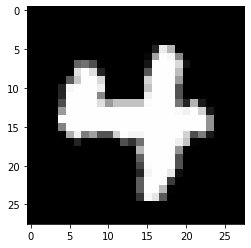

152 7


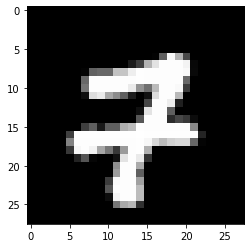

146 0


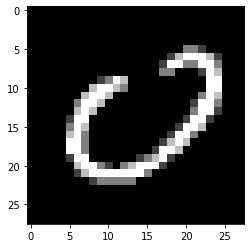

90 2


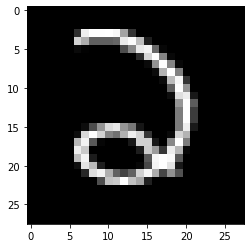

84 4


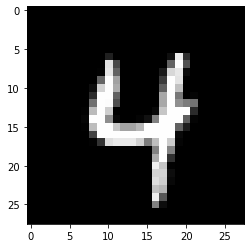

191 4


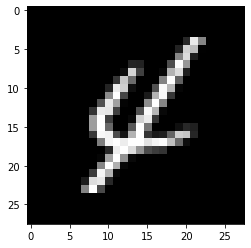

185 3


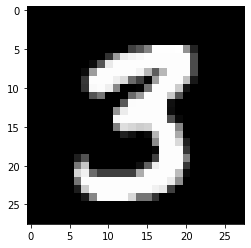

53 5


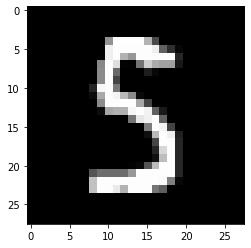

1 6


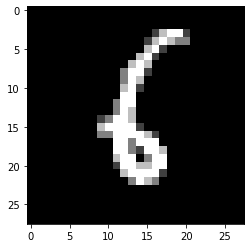

47 4


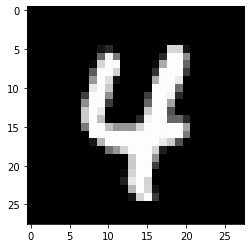

224 6


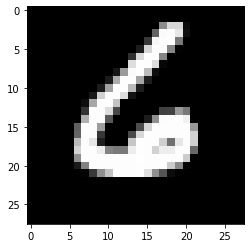

230 0


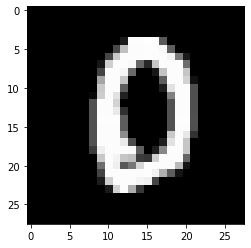

218 3


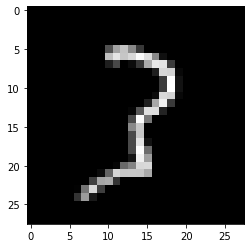

219 3


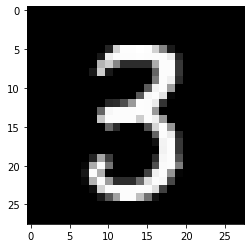

231 1


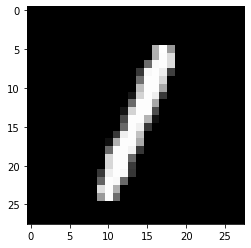

225 4


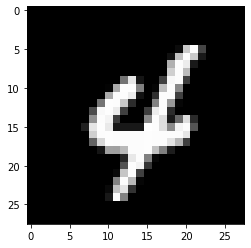

46 9


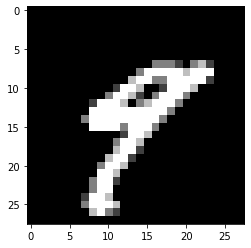

52 2


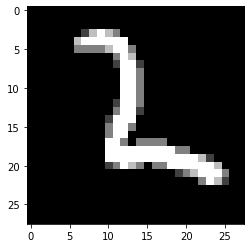

0 0


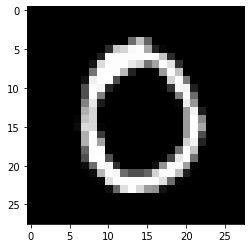

184 8


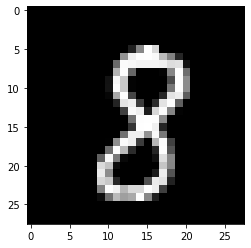

190 6


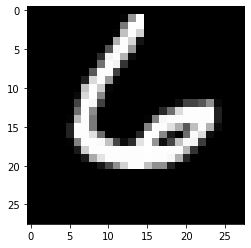

85 7


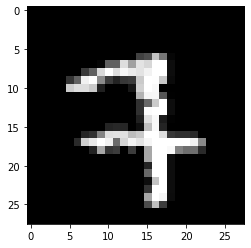

91 1


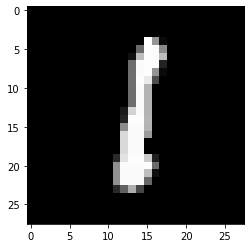

147 1


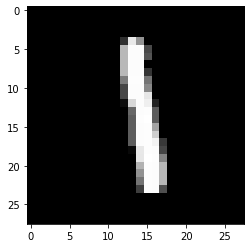

153 5


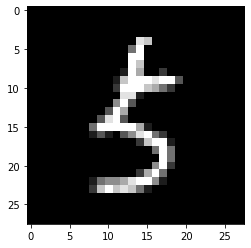

386 8


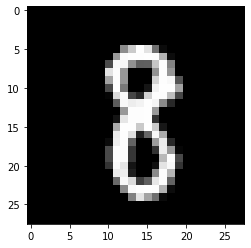

392 9


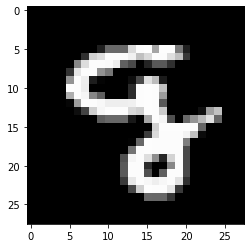

379 8


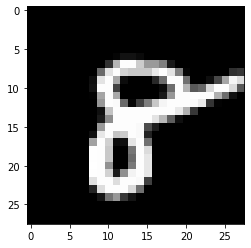

423 0


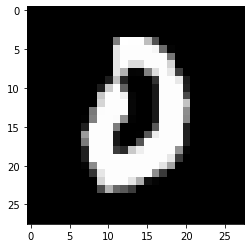

345 6


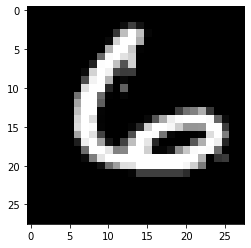

351 5


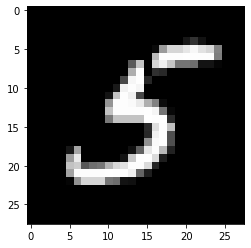

437 8


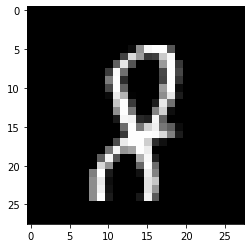

In [331]:
for index, row in answer.iterrows():
    name = row['index']
    print(row['index'],row['target'])
    img = read_image(os.path.join(IMAGE_TEST_PATH, f"{name}.png"))
    plt.imshow(img, cmap='gray')
    plt.grid(False)
    plt.show()